In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from numpy.ma.core import count
from prompt_toolkit.key_binding.bindings.named_commands import yank_pop

warnings.filterwarnings('ignore')

In [29]:
bd = pd.read_csv('final.csv')

In [30]:
bd['finish_dttm'] = pd.to_datetime(bd['finish_dttm'])
bd['age'] = bd['age'].str.replace(',', '.').astype(float)

In [31]:
bd['flag'] = (bd['wo_hit_status_result_desc'] == 'Дозвон, Успешно')
bd['flag'] = bd['flag'].astype(int)
days_of_week = bd['finish_dttm'].dt.day_name()
days_of_week_num = bd['finish_dttm'].dt.weekday
bd['day_of_week'] = days_of_week
bd['num_of_week'] = days_of_week_num

In [32]:
def vibrosi(bd, i, x):
    return pd.concat([bd[bd[i] < x], bd[bd[i].isna()]])
def vibrosiVniz(bd, i, x):
    return pd.concat([bd[bd[i] > x], bd[bd[i].isna()]])
def percentsByRegion(bd, i):
    df = bd.copy()
    pt = df[df['region_size'] == i][df['age'] >= 18][df['age'] < 60][['age', 'flag']].pivot_table(index='age', columns='product_cd', values='flag', aggfunc=['sum', 'count'])
    # pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
    # pt[pt['percent'] != 0]

In [33]:
bd['child_flg'] = bd['child_amt'] != 0
bd['child_flg'] = bd['child_flg'].astype(int)

In [34]:
bd = vibrosi(bd, 'confirmed_income', 40000)
bd = vibrosi(bd, 'predicted_income', 45000)
bd = vibrosiVniz(bd, 'predicted_income', 0)
bd = vibrosiVniz(bd, 'age', 13)
# хочу делить по: age, auto_flg, partnership_flg, child_flg, realty_type, functional_cd, emp_work_months_cnt, emp_gender_cd, emp_age

df = bd.drop(bd[bd['wo_hit_status_reason_desc'].isin(['Отказ прослушать предложение', 'Не звонить', 'Левый контакт', 'Отказ от диалога', 'отказ от диалога', 'Отказ от разговора', 'Не звонить, резкий негатив', 'Негатив/Не звонить', 'Отказ без объяснения причин', 'просит не звонить', 'Не звонить / резкий негатив', 'Вежливо попросил не звонить', 'Номер не принадлежит страхователю', 'отказ без объяснения причин', 'Отказался озвучить причину', 'Чёрный список', 'негатив к Тинькофф', 'Грубо попросил не звонить', 'Не звонить (негатив)', 'Отказался от диалога', 'Просит больше не звонить', 'Недозвон', 'некорректная заявка', 'Техническая ошибка', 'Не нравится Т-Банк', 'Негатив к Т-Банку', 'Негативная информация о клиенте', 'Отказ без объяснения причины', 'Неизвестен / Не контактирует', 'Человек не участвовал в Дано', 'отменили'])].index)

In [35]:
df = bd.drop(bd[bd['wo_hit_status_reason_desc'].isin(['Отказ прослушать предложение', 'Не звонить', 'Левый контакт', 'Отказ от диалога', 'отказ от диалога', 'Отказ от разговора', 'Не звонить, резкий негатив', 'Негатив/Не звонить', 'Отказ без объяснения причин', 'просит не звонить', 'Не звонить / резкий негатив', 'Вежливо попросил не звонить', 'Номер не принадлежит страхователю', 'отказ без объяснения причин', 'Отказался озвучить причину', 'Чёрный список', 'негатив к Тинькофф', 'Грубо попросил не звонить', 'Не звонить (негатив)', 'Отказался от диалога', 'Просит больше не звонить', 'Недозвон', 'некорректная заявка', 'Техническая ошибка', 'Не нравится Т-Банк', 'Негатив к Т-Банку', 'Негативная информация о клиенте', 'Отказ без объяснения причины', 'Неизвестен / Не контактирует', 'Человек не участвовал в Дано', 'отменили'])].index)
# Создание нового столбца с логикой замещения NaN
df['income'] = df['confirmed_income'].fillna(df['predicted_income'])
df['segment_number'] = df['segment_cd'].str.extract(r'\((\d+)\)').astype(float)
df['num_segment'] = (df['segment_cd'].str[2:4])
df['num_segment'] = df['num_segment'].astype(float)

In [103]:
# Функция для определения сезона по номеру месяца
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    elif month in [9, 10, 11]:
        return 'Осень'

# Преобразуем finish_dttm в datetime, если нужно
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'])

# Извлекаем номер месяца
df['month'] = df['finish_dttm'].dt.month
df['hours'] = df['finish_dttm'].dt.hour

# Применяем функцию для создания нового столбца season
df['season'] = df['month'].apply(get_season)

In [104]:
df

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,flag,day_of_week,num_of_week,child_flg,income,segment_number,num_segment,month,season,hours
23,23,342879157,27.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Monday,0,1,20323.50,NaN,NaN,1,Зима,16
58,58,141070875,34.0,M,urban,0.0,0.0,1.0,0.0,1.0,...,0,Monday,0,0,27662.12,5.0,2.0,9,Осень,11
63,63,282407696,41.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,0,Saturday,5,0,15823.50,7.0,2.0,2,Зима,7
94,94,412878747,26.0,M,urban,0.0,0.0,0.0,0.0,1.0,...,0,Saturday,5,0,13402.31,17.0,5.0,11,Осень,12
95,95,117256098,37.0,M,town,0.0,1.0,1.0,0.0,1.0,...,0,Friday,4,1,8886.00,16.0,4.0,7,Лето,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,18177,582511456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Tuesday,1,1,NaN,NaN,NaN,5,Весна,19
18220,18220,539821879,NaN,NaN,msk,1.0,0.0,0.0,0.0,1.0,...,0,Thursday,3,0,NaN,26.0,10.0,1,Зима,11
18287,18287,533346333,NaN,F,town,0.0,1.0,1.0,0.0,1.0,...,1,Tuesday,1,1,NaN,28.0,6.0,11,Осень,12
18353,18353,476196896,NaN,NaN,urban,1.0,0.0,0.0,0.0,0.0,...,0,Sunday,6,0,NaN,27.0,7.0,12,Зима,20


In [242]:
table = {}
for i in df['region_size'].unique():
    if str(i) == 'nan':
        continue
    pt = df[df['region_size'] == i][df['age'] >= 14][df['age'] < 60].pivot_table(index='product_cd', values='flag', aggfunc=['sum', 'count'])
    pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
    table[str(i)+" count"] = pt[('count', 'flag')]
count_by_region = pd.DataFrame(table)

In [243]:
table = {}
for i in df['region_size'].unique():
    if str(i) == 'nan':
        continue
    pt = df[df['region_size'] == i][df['age'] >= 14][df['age'] < 60].pivot_table(index='product_cd', values='flag', aggfunc=['sum', 'count'])
    pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
    table[str(i)+" percent"] = pt['percent']
percent_by_region = pd.DataFrame(table)

In [244]:
indices_to_keep = ['Cash Loan', 'Credit Cards', 'MVNO', 'Debit Cards']

In [245]:
count_by_region.loc[indices_to_keep]

,urban count,rural count,town count,msk count
product_cd,,,,
Cash Loan,385.0,186.0,1009,225.0
Credit Cards,985.0,373.0,2136,605.0
MVNO,261.0,140.0,653,131.0
Debit Cards,124.0,69.0,319,66.0


In [246]:
percent_by_region.loc[indices_to_keep] # красный - город, синий - мск, зеленый - город миллионник, фиолетовый - сельская местность

,urban percent,rural percent,town percent,msk percent
product_cd,,,,
Cash Loan,9.090909,15.053763,10.604559,13.333333
Credit Cards,9.035533,16.085791,13.295880,6.776860
MVNO,18.773946,20.714286,20.061256,19.083969
Debit Cards,58.064516,60.869565,58.307210,66.666667


In [247]:
bd[bd['region_size'] == 'msk'][bd['age'] >= 18][bd['age'] < 60].pivot_table(index='product_cd', values='flag', aggfunc=['sum', 'count']).columns

MultiIndex([(  'sum', 'flag'),
            ('count', 'flag')],
           )

In [248]:
age = df.copy()
age['age'] = age['age']//4*4
pt = age[age['region_size'] == 'rural'][age['age'] >= 18][age['age'] < 60][['age', 'flag']].pivot_table(index='age', values='flag', aggfunc=['sum', 'count'])
pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
pt[pt['percent'] != 0]

,sum,count,percent
,flag,flag,
age,,,
20.0,7,60,11.666667
24.0,14,83,16.867470
28.0,13,89,14.606742
32.0,27,133,20.300752
36.0,28,145,19.310345
40.0,21,113,18.584071
44.0,19,100,19.000000
48.0,17,58,29.310345


In [249]:
age = df.copy()
age['age'] = age['age']//2*2
pt = age[age['age'] >= 14][age['age'] < 60][['age', 'flag']].pivot_table(index='age', values='flag', aggfunc=['sum', 'count'])
pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
pt[pt['percent'] != 0]

,sum,count,percent
,flag,flag,
age,,,
14.0,22,51,43.137255
16.0,40,104,38.461538
18.0,115,638,18.025078
20.0,101,576,17.534722
22.0,96,640,15.000000
24.0,79,619,12.762520
26.0,87,653,13.323124
28.0,105,694,15.129683


In [250]:
df['flag'].sum()/df['flag'].count()

np.float64(0.16252117926126736)

In [251]:
bd.age.value_counts()

age
36.0    675
37.0    670
35.0    633
34.0    631
33.0    588
       ... 
32.2      1
85.0      1
84.0      1
25.1      1
82.0      1
Name: count, Length: 69, dtype: int64

In [252]:
pt.columns

MultiIndex([(    'sum', 'flag'),
            (  'count', 'flag'),
            ('percent',     '')],
           )

In [253]:
bd['region_size'].value_counts()

region_size
town     6025
urban    2646
msk      1541
rural    1116
Name: count, dtype: int64

In [254]:
bd['bundle_nm'].value_counts()

bundle_nm
Pro        4372
Premium     291
XXX           1
Name: count, dtype: int64

In [255]:
# TODO: нормально очистить выбросы.

In [256]:
bd['wo_hit_status_result_desc'].value_counts()

wo_hit_status_result_desc
Дозвон, Отказ      16178
Дозвон, Успешно     2398
Name: count, dtype: int64

In [257]:
df['product_cd'].value_counts()

product_cd
Credit Cards          7395
Cash Loan             2402
MVNO                  1642
Debit Cards           1504
Investment             565
Secured Loan           435
Casco                  291
Mortgage Insurance     246
Car Loan               237
Osago                   23
Deposit                  8
Travel Avia              5
T-Auto                   2
Name: count, dtype: int64

In [258]:
pd.concat([bd.select_dtypes(include='number')], axis=1).groupby(by='auto_flg').mean()

,Unnamed: 0,customer_id,age,foreign_flg,entrepreneur_flg,traveler_flg,partnership_flg,child_amt,confirmed_income,predicted_income,state_talk_time_sec,employee_id,emp_age,emp_age_new,emp_children_cnt,emp_work_months_cnt,flag,child_flg
auto_flg,,,,,,,,,,,,,,,,,,
0.0,9209.884050,3.411204e+08,34.694043,0.017348,0.077005,0.014870,0.736414,0.290494,13172.042803,15010.143944,92.303425,167284.067977,34.781200,33.966189,1.384615,20.865018,0.149584,0.227474
1.0,9399.488818,2.882810e+08,38.710229,0.002113,0.196690,0.023596,0.847332,0.465927,15222.138340,18114.935713,95.645741,159587.514703,35.529142,34.564888,0.955556,22.778250,0.128192,0.365029


In [60]:
pd.concat([cart.select_dtypes(include='number'), cart.wo_hit_status_result_desc], axis=1).groupby(by='wo_hit_status_result_desc').mean()

,customer_id,age,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,confirmed_income,predicted_income,state_talk_time_sec,employee_id,emp_age,emp_children_cnt,emp_work_months_cnt
wo_hit_status_result_desc,,,,,,,,,,,,,,,
"Дозвон, Отказ",3.127799e+08,38.568916,0.005129,0.123923,0.480509,0.019902,0.781083,0.352893,14601.842325,15985.638966,55.079751,174344.423285,35.496852,2.390244,5.215067
"Дозвон, Успешно",3.464404e+08,38.960409,0.000000,0.119608,0.478431,0.011765,0.756863,0.325490,16212.141143,15596.757810,222.580026,122178.761118,42.776366,NaN,4.870394


In [90]:
cart.select_dtypes(include='object')

,gender_cd,region_size,realty_type,segment_cd,bundle_nm,product_cd,functional_cd,wo_hit_status_result_desc,wo_hit_status_reason_desc,emp_gender_cd,emp_citizenship_country_cd,emp_marital_status_cd
8,F,town,Квартира,t_08 (30),NaN,Credit Cards,Preapprove,"Дозвон, Отказ",Отказ прослушать предложение,W,NaN,NaN
11,F,NaN,NaN,NaN,NaN,Credit Cards,Preapprove,"Дозвон, Отказ",Кредитная карта не нужна,NaN,NaN,NaN
13,F,msk,Квартира,m_07 (18),Pro,Credit Cards,Preapprove,"Дозвон, Отказ",Не звонить,W,NaN,NaN
14,M,NaN,NaN,NaN,NaN,Credit Cards,Preapprove,"Дозвон, Отказ",Отказ прослушать предложение,W,RUS,NaN
15,M,town,Квартира,t_09 (36),NaN,Credit Cards,Utilization,"Дозвон, Отказ",Отказ от использования КК,W,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18682,M,NaN,NaN,NaN,NaN,Credit Cards,Preapprove,"Дозвон, Успешно",Назначена встреча,NaN,NaN,NaN
18683,F,town,Квартира,t_02 (8),Premium,Credit Cards,Preapprove,"Дозвон, Отказ",Отказ прослушать предложение,M,NaN,NaN
18685,F,NaN,NaN,NaN,NaN,Credit Cards,Meeting,"Дозвон, Отказ",Не нужен продукт,W,RUS,UNM
18687,F,msk,Квартира,m_09 (25),NaN,Credit Cards,Preapprove,"Дозвон, Отказ",Кредитная карта не нужна,W,NaN,NaN


In [259]:
bd['gender_cd'].dropna(inplace=True)
bd['emp_gender_cd'].dropna(inplace=True)
bd['gender'] = bd['gender_cd'] == bd['emp_gender_cd']
bd['gender'] = bd['gender'].dropna().astype(int)

In [260]:
bd['gender'].value_counts()

gender
0    16964
1     1612
Name: count, dtype: int64

In [261]:
bd[bd['gender'] == 0]['flag'].mean()

np.float64(0.1280358406036312)

In [262]:
bd['flag'].mean()

np.float64(0.1290913006029285)

In [263]:
cart[cart['auto_flg'] == 1]['flag'].mean()

NameError: name 'cart' is not defined

In [264]:
bd[bd['product_cd'] == 'Cash Loan']['flag'].mean()

np.float64(0.10802700675168792)

In [265]:
bd[['product_cd', 'flag']].groupby(by='product_cd').mean()

,flag
product_cd,
Car Loan,0.198606
Casco,0.173502
Cash Loan,0.108027
Credit Cards,0.080155
Debit Cards,0.367853
Deposit,0.000000
Investment,0.123130
MVNO,0.182830
Mortgage Insurance,0.078378


In [266]:
bd.columns

Index(['Unnamed: 0', 'customer_id', 'age', 'gender_cd', 'region_size',
       'foreign_flg', 'entrepreneur_flg', 'auto_flg', 'traveler_flg',
       'partnership_flg', 'child_amt', 'realty_type', 'segment_cd',
       'bundle_nm', 'confirmed_income', 'predicted_income', 'product_cd',
       'functional_cd', 'finish_dttm', 'state_talk_time_sec',
       'wo_hit_status_result_desc', 'wo_hit_status_reason_desc', 'employee_id',
       'emp_age', 'emp_age_new', 'emp_gender_cd', 'emp_children_cnt',
       'emp_work_months_cnt', 'emp_citizenship_country_cd',
       'emp_marital_status_cd', 'flag', 'child_flg', 'gender'],
      dtype='object')

In [267]:
bd['k'] = bd['predicted_income'] - bd['confirmed_income']

In [268]:
cart = bd[bd['product_cd'] == 'Credit Cards']

<Axes: >

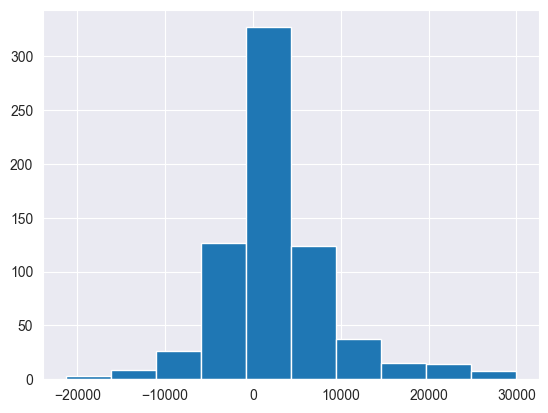

In [269]:
bd['k'].hist()

In [270]:
df = bd[bd['k'] > -50000]

In [271]:
df['k_flg'] = (df['k'] > 0)
df['k_flg'] = df['k_flg'].astype(int)

<Axes: >

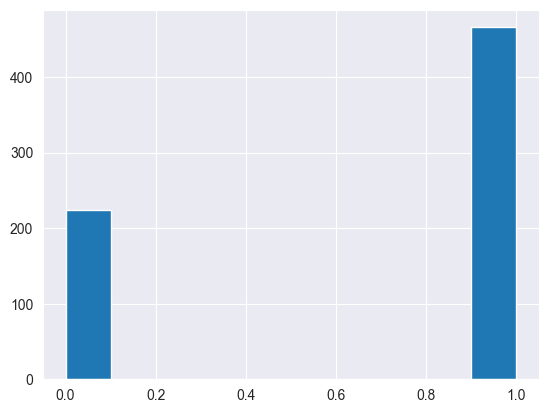

In [272]:
df['k_flg'].hist()

In [273]:
df.select_dtypes(include='number').groupby(by='k_flg').mean()

,Unnamed: 0,customer_id,age,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,confirmed_income,...,state_talk_time_sec,employee_id,emp_age,emp_age_new,emp_children_cnt,emp_work_months_cnt,flag,child_flg,gender,k
k_flg,,,,,,,,,,,,,,,,,,,,,
0,9791.491071,3.154031e+08,35.388393,0.000000,0.137931,0.620690,0.004926,0.866995,0.418719,19876.703527,...,100.409091,189412.575893,36.044643,35.589286,0.5,19.885572,0.075893,0.379464,0.111607,-3352.82317
1,9650.545064,2.922757e+08,33.452790,0.002358,0.219340,0.582547,0.028302,0.858491,0.379717,12680.011888,...,88.387931,181265.935622,35.240343,34.847639,0.0,22.586288,0.077253,0.366953,0.107296,5460.10324


In [274]:
days_of_week = bd['finish_dttm'].dt.day_name()
days_of_week_num = bd['finish_dttm'].dt.weekday
bd['day_of_week'] = days_of_week
bd['num_of_week'] = days_of_week_num

In [275]:
df = bd.copy()
pt = df[df['age'] >= 18][df['age'] < 60].pivot_table(index='num_of_week', values='flag', aggfunc=['sum', 'count'])
pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
pt

,sum,count,percent
,flag,flag,
num_of_week,,,
0,446,3231,13.803776
1,376,3110,12.090032
2,353,2969,11.889525
3,363,3052,11.893840
4,356,2904,12.258953
5,153,1077,14.206128
6,118,675,17.481481


In [276]:
bd.head(3)

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,gender,k,day_of_week,num_of_week
23,23,342879157,27.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,Россия,Холост/не замужем,0,1,0,-3530.97,Monday,0
58,58,141070875,34.0,M,urban,0.0,0.0,1.0,0.0,1.0,...,NaN,6.0,NaN,NaN,0,0,0,3664.87,Monday,0
63,63,282407696,41.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,NaN,3.0,Россия,Холост/не замужем,0,0,0,-895.68,Saturday,5


In [277]:
df['region_size'].value_counts()

region_size
town     6025
urban    2646
msk      1541
rural    1116
Name: count, dtype: int64

In [278]:
bd['weekend_flg'] = ((bd['num_of_week'] == 0) | (bd['num_of_week'] >= 5))
bd['weekend_flg'] = bd['weekend_flg'].astype(int)

In [279]:
from scipy.stats import chi2_contingency

df = bd[['flag', 'weekend_flg']]

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['flag'], df['weekend_flg'])
print("Таблица сопряженности:")
print(contingency_table)

# Тест χ²
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nχ²: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Ожидаемые значения:")
print(expected)

# Интерпретация
if p < 0.05:
    print("\nРезультат: Есть статистически значимая связь между успешностью звонка и флагом выходного дня.")
else:
    print("\nРезультат: Нет статистически значимой связи между успешностью звонка и флагом выходного дня.")


Таблица сопряженности:
weekend_flg      0     1
flag                    
0            11537  4641
1             1609   789

χ²: 17.735565807447053
p-value: 2.5383614634853447e-05
Degrees of freedom: 1
Ожидаемые значения:
[[11448.96576227  4729.03423773]
 [ 1697.03423773   700.96576227]]

Результат: Есть статистически значимая связь между успешностью звонка и флагом выходного дня.


In [280]:
bd['flag'].value_counts()

flag
0    16178
1     2398
Name: count, dtype: int64

In [281]:
bd[bd['num_of_week'] == 6]['region_size'].value_counts()

region_size
town     263
urban    106
msk       69
rural     48
Name: count, dtype: int64

In [282]:
bd[bd['num_of_week'] == 6]

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,gender,k,day_of_week,num_of_week,weekend_flg
1240,1240,326663782,21.0,F,town,0.0,0.0,1.0,0.0,1.0,...,42.0,NaN,NaN,0,0,0,1507.20,Sunday,6,1
1437,1437,371759373,27.0,M,urban,0.0,0.0,0.0,0.0,1.0,...,3.0,NaN,NaN,0,0,1,2299.81,Sunday,6,1
1779,1779,195021057,25.0,M,town,0.0,0.0,1.0,0.0,1.0,...,12.0,NaN,NaN,0,0,0,690.52,Sunday,6,1
3480,3480,433539054,20.0,F,town,0.0,0.0,0.0,0.0,1.0,...,27.0,NaN,NaN,0,0,0,-413.71,Sunday,6,1
3521,3521,68331830,42.0,M,town,0.0,0.0,1.0,0.0,1.0,...,6.0,NaN,NaN,0,1,0,-3510.48,Sunday,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15497,15497,393622713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,NaN,NaN,1,1,0,NaN,Sunday,6,1
16678,16678,471191708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,0,1,0,NaN,Sunday,6,1
16817,16817,286019375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0,1,0,NaN,Sunday,6,1
17914,17914,584048428,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,83.0,NaN,NaN,0,1,0,NaN,Sunday,6,1


In [283]:
bd[['region_size', 'confirmed_income']].groupby(by='region_size').mean()

,confirmed_income
region_size,
msk,15985.579071
rural,14608.842013
town,14250.397270
urban,13812.019893


In [284]:
table = {}
i= 'msk'
pt = bd[bd['region_size'] == i][bd['age'] >= 14][bd['age'] < 60].pivot_table(index='product_cd', values='flag', aggfunc=['sum', 'count'])
pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
table[str(i)+" percent"] = pt['percent']
percent_msk = pd.DataFrame(table)
percent_msk

,msk percent
product_cd,
Car Loan,23.809524
Casco,20.754717
Cash Loan,11.764706
Credit Cards,5.157233
Debit Cards,62.857143
Investment,7.352941
MVNO,17.241379
Mortgage Insurance,4.000000
Osago,40.000000


In [286]:
count_by_region

,urban count,msk count,rural count,town count,sum
functional_cd,,,,,
Upsell,40,23,17,106,186


In [287]:
# indices_to_keep = ['Afterfilling', 'Agreement', 'Cold', 'Upsell', 'Preapprove', 'Meeting', 'Utilization']
# count_by_region.loc[indices_to_keep]
# percent_by_region.loc[indices_to_keep]

count_by_region

,urban count,msk count,rural count,town count,sum
functional_cd,,,,,
Upsell,40,23,17,106,186


In [288]:
# percent_by_region.loc[indices_to_keep]

percent_by_region

,urban percent,msk percent,rural percent,town percent
functional_cd,,,,
Upsell,27.5,39.130435,58.823529,41.509434


In [289]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Процесс расчета RMSE
rmse = mean_squared_error(bd[bd['predicted_income'] > 0][bd['confirmed_income'] > 0]['predicted_income'], bd[bd['predicted_income'] > 0][bd['confirmed_income'] > 0]['confirmed_income'])
print(rmse)  # Вывод: "Ваш RMSE уже готов к работе!"

49932637.19347188


In [290]:
bd[bd['predicted_income'] > 0][bd['confirmed_income'] > 0][['predicted_income', 'confirmed_income']]

,predicted_income,confirmed_income
23,16792.53,20323.50
58,31326.99,27662.12
63,14927.82,15823.50
94,15823.50,13402.31
95,20647.20,8886.00
...,...,...
18569,11739.10,20678.03
18580,15046.20,8823.50
18629,18002.85,15757.89
18639,8823.50,11623.50


In [291]:
df[df['functional_cd'] == 'Upsell']

KeyError: 'functional_cd'

In [292]:
df[df['functional_cd'] == 'Upsell'][df['flag'] == 0]['wo_hit_status_reason_desc'].value_counts()

KeyError: 'functional_cd'

In [162]:
import pandasql as ps

upsell = df[df['functional_cd'] == 'Upsell']
upsell = upsell.reset_index()

q1 = """
SELECT * FROM upsell 
WHERE "index" NOT IN (
    SELECT "index" 
    FROM upsell 
    WHERE wo_hit_status_reason_desc IN (
        'Кредит уже не нужен', 'Другое', 'Отказ по всем продуктам', 
        'Другой банк', 'Третье лицо', 'Клиент ранее отказался'
    )
)
"""
upsell = ps.sqldf(q1, locals())

In [285]:
table = {}
bd_to_research_by_region = upsell

for i in bd_to_research_by_region['region_size'].unique():
    if str(i) == 'None':
        continue
    pt = bd_to_research_by_region[bd_to_research_by_region['region_size'] == i][bd_to_research_by_region['age'] >= 14][bd_to_research_by_region['age'] < 60].pivot_table(index='functional_cd', values='flag', aggfunc=['sum', 'count'])
    pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
    table[str(i)+" count"] = pt[('count', 'flag')]
    
count_by_region = pd.DataFrame(table)
count_by_region['sum'] = count_by_region['msk count'] + count_by_region['town count'] + count_by_region['urban count'] + count_by_region['rural count']

table2 = {}

for i in bd_to_research_by_region['region_size'].unique():
    if str(i) == 'None':
        continue
    pt = bd_to_research_by_region[bd_to_research_by_region['region_size'] == i][bd_to_research_by_region['age'] >= 14][bd_to_research_by_region['age'] < 60].pivot_table(index='functional_cd', values='flag', aggfunc=['sum', 'count'])
    pt['percent'] = pt[(  'sum', 'flag')] / pt[('count', 'flag')] * 100
    table2[str(i)+" percent"] = pt['percent']
percent_by_region = pd.DataFrame(table2)

In [312]:
bins = [19, 26, 30, 34, 37, 42, 48, 64]  # Границы групп
labels = ["20-26", "27-30", "31-34", "35-37", "38-42", "43-48", "49+"]           # Номера групп

upsell['age_group'] = pd.cut(upsell['age'], bins=bins, labels=labels, right=True)

In [146]:
upsell['flag'].sum()/upsell['flag'].count()

np.float64(0.4329004329004329)

In [147]:
upsell

,index,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,num_segment,month,season,age_group
0,1344,109414275,28.0,F,urban,0.0,1.0,1.0,0.0,1.0,...,NaN,6,RUS,UNM,1,0,4.0,2,Зима,27-30
1,1992,385571527,34.0,M,None,NaN,NaN,NaN,NaN,NaN,...,NaN,6,RUS,UNM,0,1,NaN,11,Осень,31-34
2,2535,259130407,46.0,F,msk,0.0,0.0,1.0,0.0,1.0,...,NaN,9,RUS,UNM,0,0,8.0,10,Осень,43-48
3,2551,110369546,28.0,F,urban,0.0,0.0,1.0,0.0,1.0,...,NaN,4,RUS,None,0,0,2.0,11,Осень,27-30
4,3319,60437159,43.0,F,urban,0.0,0.0,1.0,0.0,1.0,...,NaN,6,RUS,UNM,1,1,4.0,9,Осень,43-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,18010,454214341,51.0,M,town,0.0,0.0,0.0,0.0,0.0,...,NaN,6,None,None,1,0,3.0,10,Осень,49+
227,18131,485027314,64.0,F,town,0.0,0.0,1.0,0.0,1.0,...,NaN,6,None,None,1,0,8.0,4,Весна,49+
228,18341,147863530,29.0,M,town,0.0,1.0,1.0,0.0,1.0,...,NaN,8,None,None,0,0,2.0,5,Весна,27-30
229,18481,496372200,47.0,M,None,NaN,NaN,NaN,NaN,NaN,...,NaN,8,None,None,1,1,NaN,4,Весна,43-48


In [128]:
upsell[['child_flg', 'flag']].groupby('child_flg').agg(['mean', 'count'])


flag      
               mean count
child_flg                
0          0.421875   128
1          0.446602   103

In [124]:
# Преобразуем столбец finish_dttm в datetime (если это еще не сделано)
upsell['finish_dttm'] = pd.to_datetime(upsell['finish_dttm'])

# Создаем новый столбец month
upsell['month'] = upsell['finish_dttm'].dt.month
bins = [0, 2, 4, 6, 8, 10, 12]  # Границы групп
labels = [1, 3, 5, 7, 9, 11]    # Номера групп

upsell['month_group'] = pd.cut(upsell['month'], bins=bins, labels=labels, right=True)
upsell['month_group'] = upsell['month_group'].astype(int)

In [204]:
df['functional_cd'].value_counts()

functional_cd
Preapprove       6628
Afterfilling     1761
Utilization      1231
Upsell           1208
Cold             1119
Meeting           893
Agreement         486
Incoming          342
Downsell          191
Reutilization     158
Activation         84
BAF                48
Prolongation       46
Autoleads          30
Deposit             8
Refinancing         1
Name: count, dtype: int64

In [37]:
df['num_segment'] = (df['segment_cd'].str[2:4])
df['num_segment'] = df['num_segment'].astype(float)

In [314]:
# Функция для определения сезона по номеру месяца
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    elif month in [9, 10, 11]:
        return 'Осень'

# Преобразуем finish_dttm в datetime, если нужно
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'])

# Извлекаем номер месяца
df['month'] = df['finish_dttm'].dt.month

# Применяем функцию для создания нового столбца season
df['season'] = df['month'].apply(get_season)

In [150]:
upsell['summer_flg'] = upsell['season'] == 'Лето'
upsell['summer_flg'] = upsell['summer_flg'].astype(int)

In [315]:
from statsmodels.stats.proportion import proportions_ztest

# Летние данные (summer_flg = 1)
summer_success = upsell[upsell['auto_flg'] == 0][(upsell['summer_flg'] == 1) & (upsell['flag'] == 1)].shape[0]
summer_total = upsell[upsell['auto_flg'] == 0][upsell['summer_flg'] == 1].shape[0]

# Нелетние данные (summer_flg = 0)
non_summer_success = upsell[upsell['auto_flg'] == 0][(upsell['summer_flg'] == 0) & (upsell['flag'] == 1)].shape[0]
non_summer_total = upsell[upsell['auto_flg'] == 0][upsell['summer_flg'] == 0].shape[0]

# Z-тест для пропорций
success_counts = [summer_success, non_summer_success]
total_counts = [summer_total, non_summer_total]
z_stat, p_value = proportions_ztest(success_counts, total_counts)

# Результаты
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Летом flag у людей без машины успешнее.")
else:
    print("Не можем отвергнуть нулевую гипотезу: Разницы в успешности нет.")


Z-статистика: 2.2549
P-значение: 0.0241
Отвергаем нулевую гипотезу: Летом flag у людей без машины успешнее.


In [316]:
# Функция для определения сезона по номеру месяца
def get_norm_month(month):
    if month in [4, 5, 6]:
        return 1
    return 0

upsell['norm_month'] = upsell['month'].apply(get_norm_month)
upsell['norm_month'] = upsell['norm_month'].astype(int)

In [317]:
from statsmodels.stats.proportion import proportions_ztest

# Летние данные (summer_flg = 1)
summer_success = upsell[upsell['auto_flg'] == 1][(upsell['norm_month'] == 1) & (upsell['flag'] == 1)].shape[0]
summer_total = upsell[upsell['auto_flg'] == 1][upsell['norm_month'] == 1].shape[0]

# Нелетние данные (summer_flg = 0)
non_summer_success = upsell[upsell['auto_flg'] == 1][(upsell['norm_month'] == 0) & (upsell['flag'] == 1)].shape[0]
non_summer_total = upsell[upsell['auto_flg'] == 1][upsell['norm_month'] == 0].shape[0]

# Z-тест для пропорций
success_counts = [summer_success, non_summer_success]
total_counts = [summer_total, non_summer_total]
z_stat, p_value = proportions_ztest(success_counts, total_counts)

# Результаты
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Летом flag у людей без машины в норм месяцы успешнее.")
else:
    print("Не можем отвергнуть нулевую гипотезу: Разницы в успешности нет.")


Z-статистика: 3.2413
P-значение: 0.0012
Отвергаем нулевую гипотезу: Летом flag у людей без машины в норм месяцы успешнее.


In [196]:
from statsmodels.stats.proportion import proportions_ztest

# Летние данные (summer_flg = 1)
summer_success = upsell[upsell['gender_cd'] == 'F'][(upsell['season'] == 'Зима') & (upsell['flag'] == 1)].shape[0]
summer_total = upsell[upsell['gender_cd'] == 'F'][upsell['season'] == 'Зима'].shape[0]

# Нелетние данные (summer_flg = 0)
non_summer_success = upsell[upsell['gender_cd'] == 'M'][(upsell['season'] != 'Зима') & (upsell['flag'] == 1)].shape[0]
non_summer_total = upsell[upsell['gender_cd'] == 'M'][upsell['season'] != 'Зима'].shape[0]

# Z-тест для пропорций
success_counts = [summer_success, non_summer_success]
total_counts = [summer_total, non_summer_total]
z_stat, p_value = proportions_ztest(success_counts, total_counts)

# Результаты
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Летом flag у людей без машины успешнее.")
else:
    print("Не можем отвергнуть нулевую гипотезу: Разницы в успешности нет.")


Z-статистика: 1.2338
P-значение: 0.2173
Не можем отвергнуть нулевую гипотезу: Разницы в успешности нет.


In [318]:
q2 = """
    SELECT * FROM upsell 
    WHERE "index" NOT IN
    (
    SELECT "index" 
    WHERE "auto_flg" IS na
    )
"""

upsell_without_nan = ps.sqldf(q2, locals())

PandaSQLException: (sqlite3.OperationalError) no such column: na
[SQL: 
    SELECT * FROM upsell 
    WHERE "index" NOT IN
    (
    SELECT "index" 
    WHERE "auto_flg" IS na
    )
]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [201]:
upsell[upsell['season'] == "Весна"][upsell['age_group'] == "43-48"]

,index,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,num_segment,month,season,age_group,summer_flg,norm_month
86,952,432900099,46.0,M,town,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,1.0,4,Весна,43-48,0,0
205,14115,379475222,45.0,F,None,NaN,NaN,NaN,NaN,NaN,...,None,None,1,1,NaN,4,Весна,43-48,0,0
211,14933,189414969,44.0,M,town,0.0,0.0,1.0,0.0,1.0,...,None,None,0,0,1.0,3,Весна,43-48,0,0
219,16585,479795341,43.0,F,town,0.0,0.0,1.0,0.0,1.0,...,None,None,1,1,10.0,4,Весна,43-48,0,0
229,18481,496372200,47.0,M,None,NaN,NaN,NaN,NaN,NaN,...,None,None,1,1,NaN,4,Весна,43-48,0,0


In [206]:
bins = [13, 20, 25, 30, 35, 40, 45, 50, 55, 100]  # Границы групп
labels = ["14-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55+"]           # Номера групп

upsell['big_age_groups'] = pd.cut(upsell['age'], bins=bins, labels=labels, right=True)

In [212]:
upsell_without_nan

,index,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_marital_status_cd,flag,child_flg,num_segment,month,season,age_group,summer_flg,norm_month,big_age_groups
0,1344,109414275,28.0,F,urban,0.0,1.0,1.0,0.0,1.0,...,UNM,1,0,4.0,2,Зима,27-30,0,0,25-30
1,1992,385571527,34.0,M,None,NaN,NaN,NaN,NaN,NaN,...,UNM,0,1,NaN,11,Осень,31-34,0,0,30-35
2,2535,259130407,46.0,F,msk,0.0,0.0,1.0,0.0,1.0,...,UNM,0,0,8.0,10,Осень,43-48,0,0,45-50
3,2551,110369546,28.0,F,urban,0.0,0.0,1.0,0.0,1.0,...,None,0,0,2.0,11,Осень,27-30,0,0,25-30
4,3319,60437159,43.0,F,urban,0.0,0.0,1.0,0.0,1.0,...,UNM,1,1,4.0,9,Осень,43-48,0,1,40-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,18010,454214341,51.0,M,town,0.0,0.0,0.0,0.0,0.0,...,None,1,0,3.0,10,Осень,49+,0,0,50-55
227,18131,485027314,64.0,F,town,0.0,0.0,1.0,0.0,1.0,...,None,1,0,8.0,4,Весна,49+,0,0,55+
228,18341,147863530,29.0,M,town,0.0,1.0,1.0,0.0,1.0,...,None,0,0,2.0,5,Весна,27-30,0,0,25-30
229,18481,496372200,47.0,M,None,NaN,NaN,NaN,NaN,NaN,...,None,1,1,NaN,4,Весна,43-48,0,0,45-50


In [217]:
df['functional_cd'].value_counts()

functional_cd
Preapprove       6628
Afterfilling     1761
Utilization      1231
Upsell           1208
Cold             1119
Meeting           893
Agreement         486
Incoming          342
Downsell          191
Reutilization     158
Activation         84
BAF                48
Prolongation       46
Autoleads          30
Deposit             8
Refinancing         1
Name: count, dtype: int64

In [221]:
df[df['functional_cd'] == "Afterfilling"][df['flag'] == 1][df['wo_hit_status_reason_desc'] == 'Боится закладывать квартиру']

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,num_segment,month,season
11516,215103183,45.0,M,urban,0.0,1.0,1.0,0.0,1.0,1.0,...,W,NaN,7,NaN,NaN,1,1,1.0,8,Лето
14084,473255105,44.0,M,urban,0.0,1.0,1.0,0.0,0.0,0.0,...,W,NaN,8,NaN,NaN,1,0,1.0,1,Зима
13802,166577399,26.0,F,town,0.0,0.0,0.0,0.0,1.0,0.0,...,W,NaN,11,NaN,NaN,1,0,2.0,10,Осень
297,269363787,36.0,F,town,0.0,0.0,0.0,0.0,1.0,2.0,...,W,NaN,11,NaN,NaN,1,1,7.0,10,Осень
7171,511667422,52.0,M,town,0.0,0.0,0.0,0.0,1.0,0.0,...,W,NaN,8,NaN,NaN,1,0,11.0,2,Зима
14582,549904871,28.0,M,town,0.0,0.0,0.0,0.0,1.0,0.0,...,W,NaN,8,NaN,NaN,1,0,5.0,2,Зима


In [223]:
df[df['functional_cd'] == "Utilization"]

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,num_segment,month,season
3126,501258084,38.0,F,town,0.0,0.0,0.0,0.0,1.0,1.0,...,W,NaN,11,RUS,UNM,1,1,7.0,11,Осень
5680,502883685,38.0,M,rural,0.0,0.0,0.0,0.0,1.0,0.0,...,W,0.0,0,NaN,UNM,0,0,3.0,6,Лето
6025,310062936,31.0,F,rural,0.0,0.0,0.0,0.0,1.0,0.0,...,M,NaN,0,RUS,UNM,0,0,4.0,8,Лето
9563,447594662,44.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,W,NaN,10,NaN,NaN,1,0,10.0,2,Зима
10401,137150819,47.0,F,rural,0.0,1.0,1.0,0.0,1.0,2.0,...,M,NaN,8,RUS,UNM,0,1,1.0,3,Весна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,509062054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,2,RUS,UNM,0,1,NaN,9,Осень
888,398003620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,2,RUS,UNM,0,1,NaN,8,Лето
1948,446041203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,W,NaN,4,RUS,UNM,0,1,NaN,8,Лето
11164,543620132,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,NaN,8,RUS,UNM,0,1,NaN,3,Весна


In [298]:
df[df['flag'] == 0][df['functional_cd'] == "Cold"]['wo_hit_status_reason_desc'].value_counts()

wo_hit_status_reason_desc
Другое                                                                  329
Не хочет ДК                                                             145
Дебетовая карта не нужна                                                107
Устраивает свой оператор                                                107
Не интересно                                                             53
Уже застрахован                                                          41
Нет ипотеки                                                              27
Третье лицо                                                              23
Страхуется в своей СК                                                    15
Уже является абонентом ТМ                                                12
ДНД не скоро                                                             11
Уже является абонентом Т-Мобайл                                          11
Действующий клиент                                            

In [319]:
cold = df[df['functional_cd'] == "Cold"].reset_index()
q3 = """
SELECT * FROM cold
WHERE "index" NOT IN (
    SELECT "index" FROM cold
    WHERE "wo_hit_status_reason_desc" IN (
        "Отказ после дедупликации", "Другое", "Отказ предоставить данные для заявки",
        "Ипотека в другом банке", "Отказ предоставить данные для заявки", "Отменено",
        "Регион не запущен", "Нет продаж", "Уже является абонентом Т-Мобайла", 
        "Уже купил в другом месте", "Другое;Отказ от маркетинговых коммуникаций",
        "Уже продлил в Т-Страховании чаты/МП", "Уже оставил заявку", "Другое",
        "Уже застрахован", "ДНД не скоро", "Уже является абонентом Т-Мобайл",
        "Действующий клиент"
    )
) 
"""

cold = ps.sqldf(q3, locals())

In [320]:
pd.concat([cold.select_dtypes(include='number')], axis=1).groupby(by='flag').mean()

,index,Unnamed: 0,customer_id,age,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_age,emp_age_new,emp_work_months_cnt,child_flg,gender,k,num_of_week,weekend_flg,num_segment,month
flag,,,,,,,,,,,,,,,,,,,,,
0,9236.273205,9236.273205,3.138328e+08,40.819332,0.009302,0.130233,0.469767,0.018605,0.818605,0.395349,...,37.360771,36.422067,21.558226,0.742557,0.052539,645.862778,2.294221,0.271454,5.613953,7.033275
1,8719.352941,8719.352941,3.180740e+08,40.897059,0.000000,0.255556,0.577778,0.011111,0.822222,0.511111,...,29.727941,28.632353,17.218750,0.610294,0.176471,-8938.930000,2.419118,0.308824,5.911111,7.058824


In [322]:
from scipy.stats import fisher_exact

# Создаем таблицу сопряженности (контингентную таблицу)
summer_success = upsell[(upsell['summer_flg'] == 1) & (upsell['flag'] == 1)].shape[0]
summer_fail = upsell[(upsell['summer_flg'] == 1) & (upsell['flag'] == 0)].shape[0]

non_summer_success = upsell[(upsell['summer_flg'] == 0) & (upsell['flag'] == 1)].shape[0]
non_summer_fail = upsell[(upsell['summer_flg'] == 0) & (upsell['flag'] == 0)].shape[0]

# Таблица: [[успехи летом, неуспехи летом], [успехи не летом, неуспехи не летом]]
table = [[summer_success, summer_fail], [non_summer_success, non_summer_fail]]

# Точный тест Фишера
oddsratio, p_value = fisher_exact(table)

# Результаты
print(f"Оценка отношения шансов: {oddsratio:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Летом flag успешнее.")
else:
    print("Не можем отвергнуть нулевую гипотезу: Разницы в успешности нет.")


Оценка отношения шансов: 2.2831
P-значение: 0.0097
Отвергаем нулевую гипотезу: Летом flag успешнее.


In [38]:
emp = df[['employee_id', 'emp_age', 'emp_age_new', 'emp_gender_cd', 'emp_children_cnt', 'emp_work_months_cnt', 'state_talk_time_sec', 'flag']].groupby(by=['employee_id', 'emp_gender_cd']).mean()
emp.reset_index(inplace=True)

In [39]:
emp['time_uspeh'] = 0

In [40]:
def ok(id):
    return df[df['flag'] == 1][df['employee_id'] == id]['state_talk_time_sec'].mean()

emp['time_uspeh'] = emp['employee_id'].apply(ok)

In [41]:
def min(id):
    if len(df[df['flag'] == 1][df['employee_id'] == id]['employee_id'].tolist()) == 0:
        return 0
    return np.percentile(df[df['flag'] == 1][df['employee_id'] == id]['age'], 25)

def max(id):
    if len(df[df['flag'] == 1][df['employee_id'] == id]['employee_id'].tolist()) == 0:
        return 0
    return np.percentile(df[df['flag'] == 1][df['employee_id'] == id]['age'], 75)

emp['min_age'] = emp['employee_id'].apply(min)
emp['max_age'] = emp['employee_id'].apply(max)

In [42]:
# 1. Считаем успешность по employee_id и gender_cd
success_rates = (
    df.groupby(['employee_id', 'gender_cd'])['flag']
    .mean()
    .reset_index()
    .rename(columns={'flag': 'success_rate'})
)

# 2. Для каждого employee_id выбираем gender_cd с максимальной успешностью
best_gender_per_employee = (
    success_rates.loc[success_rates.groupby('employee_id')['success_rate'].idxmax()]
    [['employee_id', 'gender_cd']]
    .rename(columns={'gender_cd': 'lovely_gender_cd'})
)

emp = emp.merge(best_gender_per_employee, on='employee_id', how='left')

In [43]:
import pandas as pd

# Рассчитываем процент успешности по каждому оператору и продукту
success_rate = df[['employee_id', 'product_cd', 'flag']].groupby(['employee_id', 'product_cd'])['flag'].mean().reset_index()
success_rate.rename(columns={'flag': 'success_rate'}, inplace=True)

# Для каждого оператора выбираем продукт с наибольшим процентом успешности
best_product = success_rate.loc[success_rate.groupby('employee_id')['success_rate'].idxmax()]

# Добавляем столбец best_product в исходный DataFrame
emp = emp.merge(best_product[['employee_id', 'product_cd']], on='employee_id', how='left')
emp.rename(columns={'product_cd': 'best_product'}, inplace=True)

In [48]:
emp = emp.rename({'flag' : 'emp_mean_flag'}, axis=1)

In [52]:
df_plus_emp = df.merge(emp[['employee_id', 'emp_mean_flag', 'time_uspeh', 'min_age', 'max_age', 'lovely_gender_cd', 'best_product']], on='employee_id', how='left')
df_plus_emp['emps_product'] = (df_plus_emp['product_cd'] == df_plus_emp['best_product']).astype(int)

In [55]:
df_plus_emp['gender_match'] = (df_plus_emp['gender_cd'] == df_plus_emp['emp_gender_cd']).astype(int)
df_plus_emp['age_matching'] = ((df_plus_emp['age'] - df_plus_emp['emp_age']).abs() <= 5).astype(int)

In [58]:
df_plus_emp['lovely_gender_cd_encoded'] = (df_plus_emp['lovely_gender_cd'] == 'M').astype(int)

In [65]:
df_plus_emp['emps_lovely_age'] = ((df_plus_emp['min_age'] < df_plus_emp['age']) & (df_plus_emp['age'] < df_plus_emp['max_age'])).astype(int)

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm

# , 'gender_match', 'emps_lovely_age'
product = 'Credit Cards'
Xy = pd.get_dummies(df_plus_emp[df_plus_emp['product_cd'] == product][['age', 'auto_flg', 'child_amt', 'emp_age', 'emp_work_months_cnt', 'num_segment', 'min_age', 'max_age', 'lovely_gender_cd_encoded', 'age_matching', 'emps_product', 'region_size', 'flag']], drop_first=True).dropna()
X = sm.add_constant(Xy.drop('flag', axis=1))
y = Xy['flag']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Коэффициенты модели
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nModel Coefficients:\n", coefficients)


Accuracy: 0.8925049309664694

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       901
           1       1.00      0.04      0.07       113

    accuracy                           0.89      1014
   macro avg       0.95      0.52      0.51      1014
weighted avg       0.90      0.89      0.85      1014


Model Coefficients:
                      Feature  Coefficient
0                      const    -2.095598
1                        age     0.014175
2                   auto_flg    -0.059621
3                  child_amt    -0.167693
4                    emp_age     0.005211
5        emp_work_months_cnt     0.015869
6                num_segment    -0.057014
7                    min_age    -0.069921
8                    max_age     0.084511
9   lovely_gender_cd_encoded    -0.323203
10              age_matching    -0.291979
11              emps_product    -0.198266
12         region_size_rural     0.468352
13       

In [94]:
pd.Series(y_pred)

0       0
1       0
2       0
3       0
4       0
       ..
1009    0
1010    0
1011    0
1012    0
1013    0
Length: 1014, dtype: int64

In [91]:
pd.get_dummies(df_plus_emp[['age', 'auto_flg', 'child_amt', 'emp_age', 'emp_work_months_cnt', 'num_segment', 'min_age', 'max_age', 'lovely_gender_cd_encoded', 'age_matching', 'emps_product', 'region_size']], drop_first=True).dropna()

,age,auto_flg,child_amt,emp_age,emp_work_months_cnt,num_segment,min_age,max_age,lovely_gender_cd_encoded,age_matching,emps_product,region_size_rural,region_size_town,region_size_urban
1,34.0,1.0,0.0,49.0,6.0,2.0,43.75,54.25,0,0,0,False,False,True
4,37.0,1.0,1.0,28.0,69.0,4.0,31.50,46.50,1,0,1,False,True,False
5,47.0,1.0,1.0,21.0,2.0,6.0,0.00,0.00,0,0,1,False,False,True
6,49.0,0.0,0.0,46.0,65.0,8.0,49.00,49.00,1,1,1,False,False,False
8,42.0,0.0,1.0,30.0,2.0,7.0,29.00,52.00,0,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14636,66.0,1.0,1.0,27.0,80.0,3.0,34.50,43.25,1,0,1,False,False,True
14640,31.0,1.0,0.0,35.0,23.0,7.0,28.25,34.75,0,1,1,False,True,False
14642,36.0,0.0,0.0,44.0,1.0,4.0,33.50,43.75,1,0,1,False,True,False
14646,35.0,0.0,0.0,31.0,42.0,7.0,0.00,0.00,0,1,1,False,True,False


In [87]:
df_plus_emp.select_dtypes(exclude=['int', 'float'])

,gender_cd,region_size,realty_type,segment_cd,bundle_nm,product_cd,functional_cd,finish_dttm,wo_hit_status_result_desc,wo_hit_status_reason_desc,emp_gender_cd,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,season,lovely_gender_cd,best_product
0,M,NaN,NaN,NaN,Pro,Credit Cards,Meeting,2024-01-22 16:00:00,"Дозвон, Отказ",Не нужен продукт,W,Россия,Холост/не замужем,Monday,Зима,F,Debit Cards
1,M,urban,Квартира,u_02 (5),Pro,Cash Loan,Agreement,2024-09-09 11:00:00,"Дозвон, Отказ",Кредит уже не нужен,W,NaN,NaN,Monday,Осень,F,Credit Cards
2,M,rural,Нет своего жилья,r_02 (7),NaN,Credit Cards,Meeting,2024-02-17 07:00:00,"Дозвон, Отказ",Пользуется картой без пластика,W,Россия,Холост/не замужем,Saturday,Зима,M,Debit Cards
3,M,urban,Квартира,u_05 (17),Pro,Cash Loan,Upsell,2023-11-18 12:00:00,"Дозвон, Отказ",Другое,W,NaN,NaN,Saturday,Осень,M,Secured Loan
4,M,town,Нет своего жилья,t_04 (16),Pro,MVNO,Afterfilling,2024-07-26 08:00:00,"Дозвон, Отказ",Другое,W,NaN,NaN,Friday,Лето,M,MVNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14791,NaN,NaN,NaN,NaN,NaN,Debit Cards,Meeting,2024-05-21 19:00:00,"Дозвон, Отказ",Другое,W,NaN,NaN,Tuesday,Весна,M,Secured Loan
14792,NaN,msk,Нет своего жилья,m_10 (26),NaN,Credit Cards,Afterfilling,2024-01-04 11:00:00,"Дозвон, Отказ",Другое (нестандартная ситуация),M,NaN,NaN,Thursday,Зима,F,Credit Cards
14793,F,town,Нет своего жилья,t_06 (28),NaN,Debit Cards,Afterfilling,2023-11-21 12:00:00,"Дозвон, Успешно",Назначена встреча,W,NaN,NaN,Tuesday,Осень,M,Debit Cards
14794,NaN,urban,Нет своего жилья,u_07 (27),NaN,Credit Cards,Afterfilling,2022-12-11 20:00:00,"Дозвон, Отказ",Не гражданин РФ,W,NaN,NaN,Sunday,Зима,M,Cash Loan


In [78]:
pd.Series(y_pred).value_counts()

0    2221
Name: count, dtype: int64

In [ ]:
norm = ['flag', 'lovely_gender_cd', 'age_matching', 'emps_product']

In [23]:
product_by_employee = df[['employee_id', 'product_cd']].groupby(by='employee_id')['product_cd'].unique()

In [95]:
product_by_employee

employee_id
871.0              [Casco]
1731.0      [Credit Cards]
2615.0             [Osago]
2645.0        [Investment]
3021.0             [Casco]
                 ...      
297968.0     [Debit Cards]
300152.0     [Debit Cards]
304414.0      [Investment]
304572.0     [Debit Cards]
305477.0      [Investment]
Name: product_cd, Length: 678, dtype: object

In [403]:
df[df['gender_cd'] == 'M']['flag'].mean()

np.float64(0.16906519834814165)

In [404]:
emp['work'] = emp['employee_id'].map(product_by_employee)

In [24]:
emp

,employee_id,emp_gender_cd,emp_age,emp_age_new,emp_children_cnt,emp_work_months_cnt,state_talk_time_sec,flag,time_uspeh,min_age,max_age,lovely_gender_cd,best_product
0,871.0,M,50.0,48.255814,NaN,69.906977,94.273438,0.124031,335.411765,36.0,40.0,F,Casco
1,1731.0,W,36.0,36.000000,NaN,80.750000,113.375000,0.125000,175.000000,46.0,46.0,M,Credit Cards
2,2615.0,W,28.0,26.000000,0.0,4.333333,NaN,0.000000,NaN,0.0,0.0,F,Osago
3,2645.0,W,46.0,44.000000,NaN,86.000000,58.000000,0.000000,NaN,0.0,0.0,M,Investment
4,3021.0,W,54.0,53.045455,NaN,71.378788,179.234375,0.227273,508.866667,36.6,40.6,F,Casco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,297968.0,W,45.0,45.000000,NaN,0.800000,72.400000,0.600000,61.333333,38.6,40.0,F,Debit Cards
557,300152.0,W,18.0,18.000000,NaN,0.000000,40.000000,0.000000,NaN,0.0,0.0,M,Debit Cards
558,304414.0,M,19.0,19.000000,NaN,NaN,28.500000,0.000000,NaN,0.0,0.0,M,Investment
559,304572.0,W,19.0,19.000000,NaN,0.000000,51.400000,0.600000,53.333333,28.4,34.6,F,Debit Cards


In [447]:
emp.columns

Index(['employee_id', 'emp_gender_cd', 'emp_age', 'emp_age_new',
       'emp_children_cnt', 'emp_work_months_cnt', 'state_talk_time_sec',
       'flag', 'time_uspeh', 'min_age', 'max_age', 'lovely_gender_cd', 'work'],
      dtype='object')

In [452]:
# Объединение данных
emp_cc = emp[emp['work'].apply(lambda x: 'Credit Cards' in x)]

merged_df = df[df['product_cd'] == 'Credit Cards'].merge(emp_cc, on='employee_id', how='left')

# # Создание признаков соответствия
merged_df['gender_match'] = merged_df['gender_cd'] == merged_df['emp_gender_cd_x']
merged_df['age_match'] = (merged_df['emp_age_x'] >= merged_df['min_age']) & (merged_df['emp_age_x'] <= merged_df['max_age'])
merged_df['time_efficiency'] = merged_df['state_talk_time_sec_x'] / merged_df['time_uspeh']  # Пример производительности

In [453]:
merged_df

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,state_talk_time_sec_y,flag_y,time_uspeh,min_age,max_age,lovely_gender_cd,work,gender_match,age_match,time_efficiency
0,23,342879157,27.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,84.363636,0.300000,138.090909,33.4,36.6,F,"[Credit Cards, Debit Cards]",False,False,0.311389
1,63,282407696,41.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,92.765957,0.333333,131.777778,NaN,NaN,M,"[Credit Cards, Debit Cards]",False,False,NaN
2,117,509469281,42.0,F,town,0.0,0.0,0.0,0.0,1.0,...,123.666667,0.217391,284.400000,36.8,46.0,F,"[Credit Cards, Debit Cards, Cash Loan]",False,False,NaN
3,710,326663782,21.0,F,town,0.0,0.0,1.0,0.0,1.0,...,90.969925,0.048872,302.052632,39.8,47.4,M,[Credit Cards],False,False,0.076146
4,1178,480706447,44.0,M,town,0.0,0.0,0.0,0.0,1.0,...,90.969925,0.048872,302.052632,39.8,47.4,M,[Credit Cards],False,False,0.168845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,18077,584331549,NaN,M,town,0.0,0.0,0.0,0.0,0.0,...,76.173913,0.043478,208.000000,43.0,43.0,M,[Credit Cards],True,False,0.163462
7391,18110,525669032,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,133.054545,0.481818,164.188679,34.0,41.2,M,"[Credit Cards, Debit Cards]",False,True,0.261894
7392,18220,539821879,NaN,NaN,msk,1.0,0.0,0.0,0.0,1.0,...,57.666667,0.055556,219.000000,23.8,24.2,F,"[Credit Cards, MVNO]",False,True,0.337900
7393,18353,476196896,NaN,NaN,urban,1.0,0.0,0.0,0.0,0.0,...,100.898305,0.169492,280.700000,29.8,40.0,M,"[Cash Loan, Credit Cards, Debit Cards]",False,True,0.149626


In [455]:
correlations = merged_df[['gender_match', 'age_match', 'time_efficiency', 'flag_x']].corr()
print(correlations)


                 gender_match  age_match  time_efficiency    flag_x
gender_match         1.000000  -0.026109        -0.034060 -0.026996
age_match           -0.026109   1.000000        -0.005965  0.049248
time_efficiency     -0.034060  -0.005965         1.000000  0.484893
flag_x              -0.026996   0.049248         0.484893  1.000000


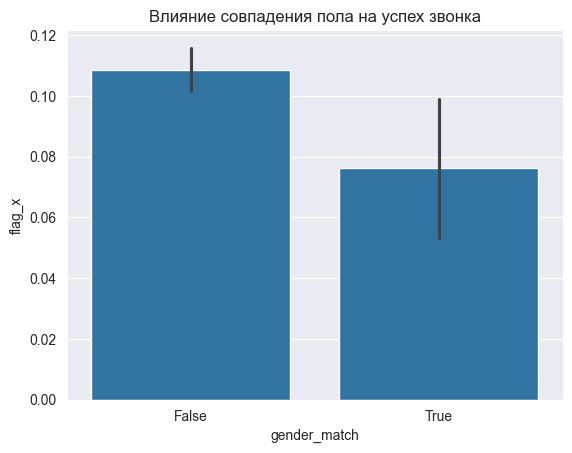

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='gender_match', y='flag_x', data=merged_df)
plt.title('Влияние совпадения пола на успех звонка')
plt.show()


In [457]:
merged_df.columns

Index(['Unnamed: 0', 'customer_id', 'age', 'gender_cd', 'region_size',
       'foreign_flg', 'entrepreneur_flg', 'auto_flg', 'traveler_flg',
       'partnership_flg', 'child_amt', 'realty_type', 'segment_cd',
       'bundle_nm', 'confirmed_income', 'predicted_income', 'product_cd',
       'functional_cd', 'finish_dttm', 'state_talk_time_sec_x',
       'wo_hit_status_result_desc', 'wo_hit_status_reason_desc', 'employee_id',
       'emp_age_x', 'emp_age_new_x', 'emp_gender_cd_x', 'emp_children_cnt_x',
       'emp_work_months_cnt_x', 'emp_citizenship_country_cd',
       'emp_marital_status_cd', 'flag_x', 'child_flg', 'gender', 'k',
       'day_of_week', 'num_of_week', 'weekend_flg', 'num_segment', 'month',
       'season', 'emp_gender_cd_y', 'emp_age_y', 'emp_age_new_y',
       'emp_children_cnt_y', 'emp_work_months_cnt_y', 'state_talk_time_sec_y',
       'flag_y', 'time_uspeh', 'min_age', 'max_age', 'lovely_gender_cd',
       'work', 'gender_match', 'age_match', 'time_efficiency'],
     

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm

merged_df['time_efficiency'] = merged_df['time_efficiency'].replace([float('inf'), float('-inf')], merged_df['time_efficiency'].max())

# Выбор признаков и целевой переменной
X = merged_df[['gender_match', 'age_match']].fillna(0)
X = sm.add_constant(X)
y = merged_df['flag_x']

X = X.fillna(0)  # Заменить NaN на 0
X = X.replace([float('inf'), float('-inf')], 0)  # Заменить inf на 0

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1984
           1       0.00      0.00      0.00       235

    accuracy                           0.89      2219
   macro avg       0.45      0.50      0.47      2219
weighted avg       0.80      0.89      0.84      2219



In [459]:
# Проверка на NaN и inf
print("NaN в 'flag_x':", merged_df['flag_x'].isna().sum())
print("inf в 'flag_x':", merged_df['flag_x'].isin([float('inf'), float('-inf')]).sum())

# Замена NaN на среднее значение
merged_df['flag_x'] = merged_df['flag_x'].fillna(merged_df['flag_x'].mean())

# Замена inf на максимальное значение
merged_df['flag_x'] = merged_df['flag_x'].replace([float('inf'), float('-inf')], merged_df['flag_x'].max())

# Проверка после обработки
print("NaN после обработки:", merged_df['flag_x'].isna().sum())
print("inf после обработки:", merged_df['flag_x'].isin([float('inf'), float('-inf')]).sum())


NaN в 'flag_x': 0
inf в 'flag_x': 0
NaN после обработки: 0
inf после обработки: 0


In [460]:
print(X.isna().sum())  # Проверка NaN по каждому столбцу
print((X == float('inf')).sum())  # Проверка inf
print((X == float('-inf')).sum())  # Проверка -inf


const           0
gender_match    0
age_match       0
dtype: int64
const           0
gender_match    0
age_match       0
dtype: int64
const           0
gender_match    0
age_match       0
dtype: int64


In [461]:
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)


        Feature  Coefficient
0         const     0.048630
1  gender_match    -0.338284
2     age_match     0.466240


In [448]:
df['product_cd'].value_counts()

product_cd
Credit Cards          7395
Cash Loan             2402
MVNO                  1642
Debit Cards           1504
Investment             565
Secured Loan           435
Casco                  291
Mortgage Insurance     246
Car Loan               237
Osago                   23
Deposit                  8
Travel Avia              5
T-Auto                   2
Name: count, dtype: int64

In [449]:
df[df['product_cd'] == 'Credit Cards']

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,flag,child_flg,gender,k,day_of_week,num_of_week,weekend_flg,num_segment,month,season
23,23,342879157,27.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,-3530.97,Monday,0,1,NaN,1,Зима
63,63,282407696,41.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,0,0,0,-895.68,Saturday,5,1,2.0,2,Зима
117,117,509469281,42.0,F,town,0.0,0.0,0.0,0.0,1.0,...,0,1,0,-438.70,Friday,4,0,7.0,2,Зима
710,710,326663782,21.0,F,town,0.0,0.0,1.0,0.0,1.0,...,0,0,0,327.79,Thursday,3,0,9.0,10,Осень
1178,1178,480706447,44.0,M,town,0.0,0.0,0.0,0.0,1.0,...,0,1,0,6616.48,Friday,4,0,4.0,8,Лето
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18077,18077,584331549,NaN,M,town,0.0,0.0,0.0,0.0,0.0,...,0,0,1,NaN,Wednesday,2,0,12.0,6,Лето
18110,18110,525669032,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,NaN,Thursday,3,0,NaN,9,Осень
18220,18220,539821879,NaN,NaN,msk,1.0,0.0,0.0,0.0,1.0,...,0,0,0,NaN,Thursday,3,0,10.0,1,Зима
18353,18353,476196896,NaN,NaN,urban,1.0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,Sunday,6,1,7.0,12,Зима


In [450]:
emp

,employee_id,emp_gender_cd,emp_age,emp_age_new,emp_children_cnt,emp_work_months_cnt,state_talk_time_sec,flag,time_uspeh,min_age,max_age,lovely_gender_cd,work
0,871.0,M,50.0,48.255814,NaN,69.906977,94.273438,0.124031,335.411765,36.0,40.0,F,[Casco]
1,1731.0,W,36.0,36.000000,NaN,80.750000,113.375000,0.125000,175.000000,46.0,46.0,M,[Credit Cards]
2,2615.0,W,28.0,26.000000,0.0,4.333333,NaN,0.000000,NaN,0.0,0.0,F,[Osago]
3,2645.0,W,46.0,44.000000,NaN,86.000000,58.000000,0.000000,NaN,0.0,0.0,M,[Investment]
4,3021.0,W,54.0,53.045455,NaN,71.378788,179.234375,0.227273,508.866667,36.6,40.6,F,[Casco]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,297968.0,W,45.0,45.000000,NaN,0.800000,72.400000,0.600000,61.333333,38.6,40.0,F,[Debit Cards]
557,300152.0,W,18.0,18.000000,NaN,0.000000,40.000000,0.000000,NaN,0.0,0.0,M,[Debit Cards]
558,304414.0,M,19.0,19.000000,NaN,NaN,28.500000,0.000000,NaN,0.0,0.0,M,[Investment]
559,304572.0,W,19.0,19.000000,NaN,0.000000,51.400000,0.600000,53.333333,28.4,34.6,F,[Debit Cards]


In [464]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'age', 'gender_cd', 'region_size',
       'foreign_flg', 'entrepreneur_flg', 'auto_flg', 'traveler_flg',
       'partnership_flg', 'child_amt', 'realty_type', 'segment_cd',
       'bundle_nm', 'confirmed_income', 'predicted_income', 'product_cd',
       'functional_cd', 'finish_dttm', 'state_talk_time_sec',
       'wo_hit_status_result_desc', 'wo_hit_status_reason_desc', 'employee_id',
       'emp_age', 'emp_age_new', 'emp_gender_cd', 'emp_children_cnt',
       'emp_work_months_cnt', 'emp_citizenship_country_cd',
       'emp_marital_status_cd', 'flag', 'child_flg', 'gender', 'k',
       'day_of_week', 'num_of_week', 'weekend_flg', 'num_segment', 'month',
       'season'],
      dtype='object')

In [123]:
# Фильтрация клиентов по продукту Credit Cards
cc_clients = df[df['product_cd'] == 'Credit Cards']

In [124]:
import pandasql as ps
q4 = """
SELECT * FROM cc_clients
WHERE "Unnamed: 0" NOT IN (
    SELECT "Unnamed: 0" FROM cc_clients
    WHERE "wo_hit_status_reason_desc" IN (
        "Третье лицо", "Другое", "Другой банк", "Карту навязали",
        "Заявку не оставлял", "Другое (нестандартная ситуация)",
        "Кредит / КК в другом банке", "Отказ предоставить персональные данные",
        "Другое (укажи в комментарии)", "Не соответствует по возрасту",
        "Пользуюсь другим антивирусом", "Некорректный трансфер", "Клиент ранее отказался"
    ) 
)
"""

cc_clients = ps.sqldf(q4, locals())

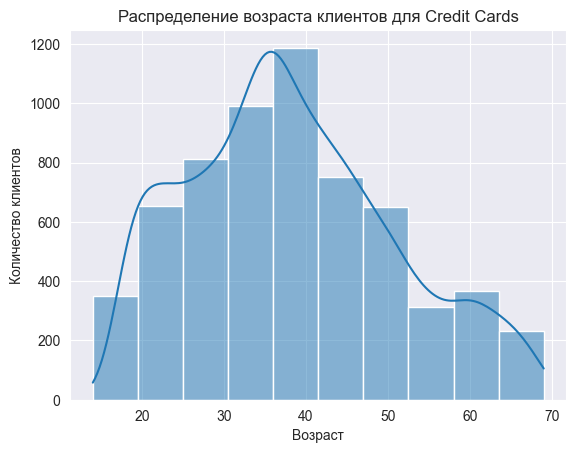

Средний возраст: 38.33
Медианный возраст: 37.00


In [573]:
sns.histplot(cc_clients[cc_clients['age'] < 70]['age'], bins=10, kde=True)
plt.title('Распределение возраста клиентов для Credit Cards')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

mean_age = cc_clients['age'].mean()
median_age = cc_clients['age'].median()

print(f"Средний возраст: {mean_age:.2f}")
print(f"Медианный возраст: {median_age:.2f}")


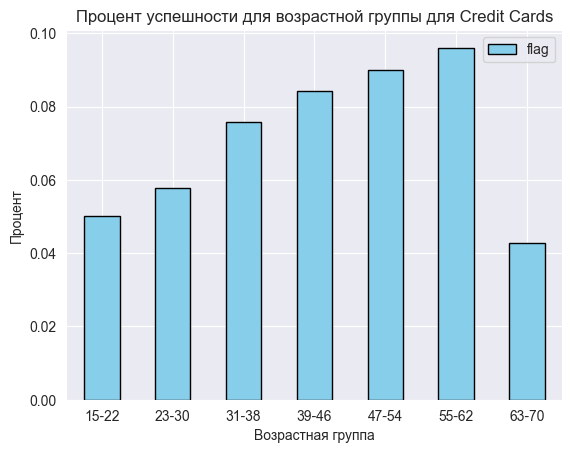

In [153]:
import math

def Anton(x, musthave, c):
    # Определяем k (для минимального числа) и n (для максимального числа)
    k = math.ceil((musthave - 14) / c)
    n = math.ceil((68 - musthave) / c)
    
    # Номер группы
    if x < musthave:  # Группы ниже musthave
        group = k - math.ceil((musthave - x) / c) + 1
    elif x >= musthave:  # Группы выше или равны musthave
        group = k + math.floor((x - musthave) / c) + 1
    
    return group


def Dima(musthave, c):
    import math
    
    # Определяем k и n
    k = math.ceil((musthave - 14) / c)
    n = math.ceil((68 - musthave) / c)
    
    # Массив групп
    groups = []
    for i in range(-(k - 2), n+1):  # От второй группы до предпоследней
        group_start = musthave + (i - 1) * c
        group_end = musthave + i * c - 1
        groups.append(f"{group_start}-{group_end}")
    
    # Числа начала второй группы и конца предпоследней
    second_group_start = musthave - (k - 1) * c
    penultimate_group_end = musthave + (n - 1) * c - 1
    
    return groups, second_group_start, penultimate_group_end

# Пример вызова функции
musthave = 15
c = 8
groups, second_start, penultimate_end = Dima(musthave, c)

percent_by_age = ccc_preapprove[ccc_preapprove['age'] <= 68][['age', 'flag']].copy()
percent_by_age = percent_by_age[np.isfinite(percent_by_age['age'])]
percent_by_age['age_group'] = percent_by_age['age'].apply(lambda x: Anton(x, musthave, c))
percent_by_age = percent_by_age[['age_group', 'flag']].groupby('age_group').mean()

ax = percent_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
labels = groups
# if second_start != 14:
#     labels = [f'14-{second_start-1}'] + labels
# if penultimate_end != 71:
#     labels = labels + [f'{penultimate_end}+']
ax.set_xticklabels(labels, rotation=0)
plt.title("Процент успешности для возрастной группы для Credit Cards")
plt.xlabel("Возрастная группа")
plt.ylabel("Процент")
plt.show()

In [150]:
groups

['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']

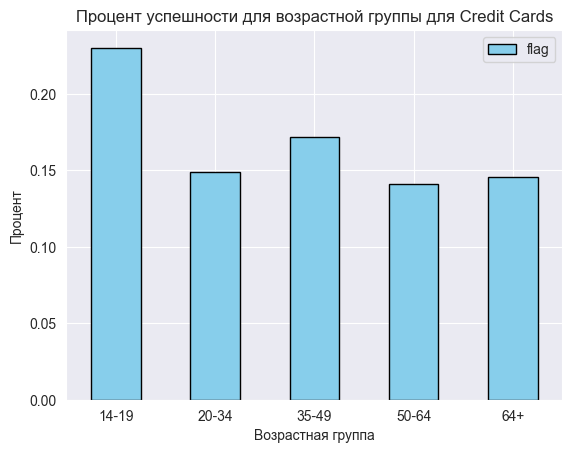

In [109]:
import math

def Anton(x, musthave, c):
    # Определяем k (для минимального числа) и n (для максимального числа)
    k = math.ceil((musthave - 14) / c)
    n = math.ceil((68 - musthave) / c)
    
    # Номер группы
    if x < musthave:  # Группы ниже musthave
        group = k - math.ceil((musthave - x) / c) + 1
    elif x >= musthave:  # Группы выше или равны musthave
        group = k + math.floor((x - musthave) / c) + 1
    
    return group


def Dima(musthave, c):
    import math
    
    # Определяем k и n
    k = math.ceil((musthave - 14) / c)
    n = math.ceil((68 - musthave) / c)
    
    # Массив групп
    groups = []
    for i in range(-(k - 2), n):  # От второй группы до предпоследней
        group_start = musthave + (i - 1) * c
        group_end = musthave + i * c - 1
        groups.append(f"{group_start}-{group_end}")
    
    # Числа начала второй группы и конца предпоследней
    second_group_start = musthave - (k - 1) * c
    penultimate_group_end = musthave + (n - 1) * c - 1
    
    return groups, second_group_start, penultimate_group_end

# Пример вызова функции
musthave = 35
c = 15
groups, second_start, penultimate_end = Dima(musthave, c)

percent_by_age = df[df['age'] <= 68][['age', 'flag']].copy()
percent_by_age = percent_by_age[np.isfinite(percent_by_age['age'])]
percent_by_age['age_group'] = percent_by_age['age'].apply(lambda x: Anton(x, musthave, c))
percent_by_age = percent_by_age[['age_group', 'flag']].groupby('age_group').mean()

ax = percent_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
labels = groups
if second_start != 14:
    labels = [f'14-{second_start-1}'] + labels
if penultimate_end != 71:
    labels = labels + [f'{penultimate_end}+']
ax.set_xticklabels(labels, rotation=0)
plt.title("Процент успешности для возрастной группы для Credit Cards")
plt.xlabel("Возрастная группа")
plt.ylabel("Процент")
plt.show()

In [23]:
cc_clients['region_size'].value_counts()

region_size
town     2255
urban    1035
msk       641
rural     400
Name: count, dtype: int64

Распределение по полу:
gender_cd
M    51.659156
F    48.340844
Name: proportion, dtype: float64


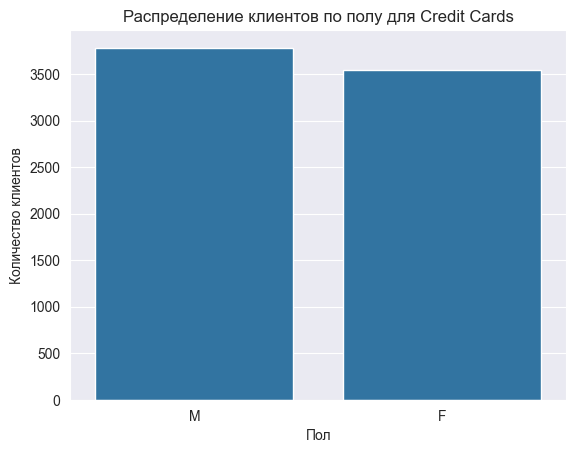

In [24]:
# Распределение по полу
gender_distribution = cc_clients['gender_cd'].value_counts(normalize=True) * 100

print("Распределение по полу:")
print(gender_distribution)

# Визуализация
sns.countplot(x='gender_cd', data=cc_clients)
plt.title('Распределение клиентов по полу для Credit Cards')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()


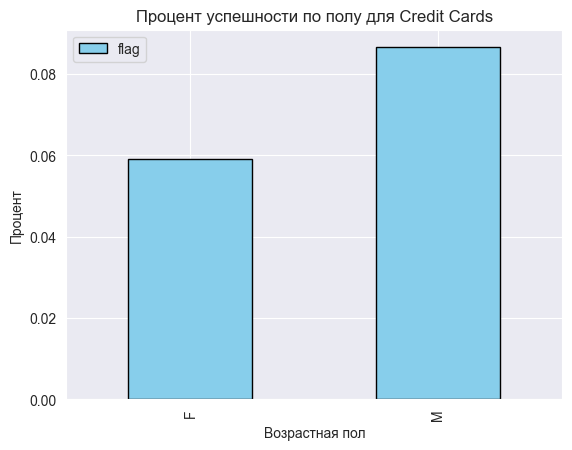

In [141]:
percent_by_gender = ccc_preapprove[['flag', 'gender_cd']].copy()
# percent_by_gender = percent_by_gender[np.isfinite(percent_by_gender['gender_cd'])]
percent_by_gender = percent_by_gender.groupby('gender_cd').mean()

ax = percent_by_gender.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Процент успешности по полу для Credit Cards")
plt.xlabel("Возрастная пол")
plt.ylabel("Процент")
plt.show()

Распределение по количеству детей:
child_amt
0.0    72.269684
1.0    22.004156
2.0     4.525514
3.0     1.015932
4.0     0.138536
5.0     0.023089
7.0     0.023089
Name: proportion, dtype: float64


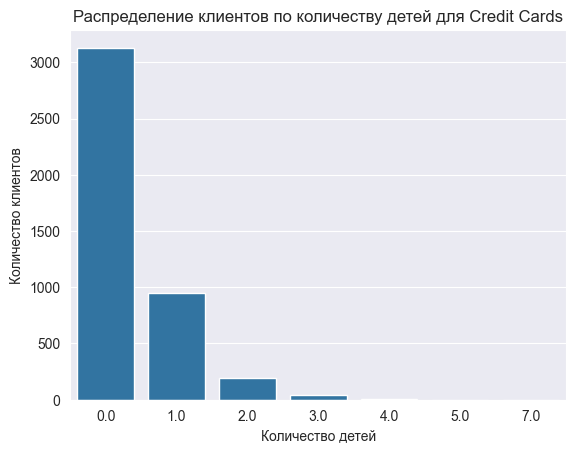

In [26]:
# Распределение по количеству детей
child_distribution = cc_clients['child_amt'].value_counts(normalize=True) * 100

print("Распределение по количеству детей:")
print(child_distribution)

# Визуализация
sns.countplot(x='child_amt', data=cc_clients)
plt.title('Распределение клиентов по количеству детей для Credit Cards')
plt.xlabel('Количество детей')
plt.ylabel('Количество клиентов')
plt.show()


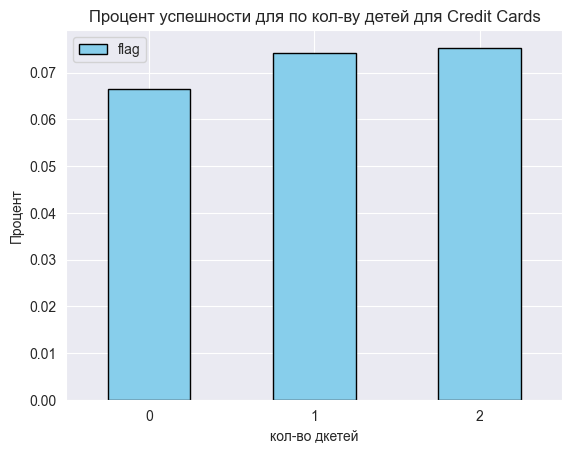

In [138]:
percent_by_child_cnt = ccc_preapprove[ccc_preapprove['child_amt'] < 3][['child_amt', 'flag']].copy()
percent_by_child_cnt = percent_by_child_cnt[np.isfinite(percent_by_child_cnt['child_amt'])]
percent_by_child_cnt = percent_by_child_cnt.groupby('child_amt').mean()

ax = percent_by_child_cnt.plot(kind='bar', color='skyblue', edgecolor='black')
labels = [0, 1, 2]
ax.set_xticklabels(labels, rotation=0)
plt.title("Процент успешности для по кол-ву детей для Credit Cards")
plt.xlabel("кол-во дкетей")
plt.ylabel("Процент")
plt.show()

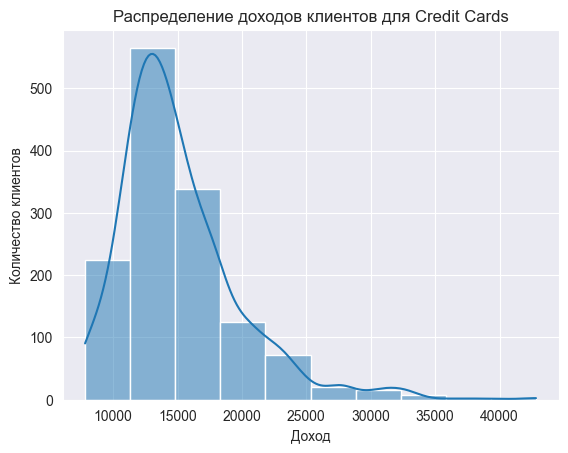

Средний доход: 15136.62
Медианный доход: 14117.89


In [28]:
# Гистограмма доходов
cc_clients['income'] = cc_clients['confirmed_income'].fillna(cc_clients['predicted_income'])

sns.histplot(cc_clients['income'], bins=10, kde=True)
plt.title('Распределение доходов клиентов для Credit Cards')
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')
plt.show()

# Средняя и медианная зарплата
mean_income = cc_clients['income'].mean()
median_income = cc_clients['income'].median()

print(f"Средний доход: {mean_income:.2f}")
print(f"Медианный доход: {median_income:.2f}")


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (3).

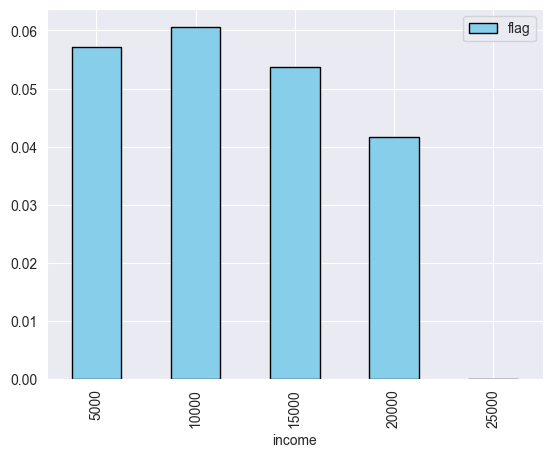

In [137]:
ccc_preapprove['income'] = ccc_preapprove['confirmed_income'].fillna(ccc_preapprove['predicted_income'])
percent_by_income = ccc_preapprove[ccc_preapprove['income'] < 28000][['flag', 'income']].copy()
percent_by_income = percent_by_income[np.isfinite(percent_by_income['income'])]
percent_by_income['income'] = (percent_by_income[percent_by_income['income'] > 0000]['income'] // 5000 * 5000).astype(int)
percent_by_income = percent_by_income.groupby('income').mean()

ax = percent_by_income.plot(kind='bar', color='skyblue', edgecolor='black')
labels = [(str(i) + 'к - ' + str(i+8) + 'к') for i in range(8, 28, 7)]
ax.set_xticklabels(labels, rotation=0)
plt.title("Процент успешности для зарплат для Credit Cards")
plt.xlabel("зарплата")
plt.ylabel("Процент")
plt.show()

In [30]:
print(cc_clients['income'].min())
print(cc_clients['income'].max())

7823.5
42823.5


In [31]:
cc_clients[cc_clients['gender_cd'] == 'M'][45 <= cc_clients['age'] < 50][10000 <= cc_clients['income'] < 15000][cc_clients['region_size'] == 'rural']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [46]:
cc_clients[cc_clients['gender_cd'] == 'M'][45 <= cc_clients['age']][cc_clients['age'] < 60][cc_clients['region_size'] == 'rural']

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_citizenship_country_cd,emp_marital_status_cd,flag,day_of_week,num_of_week,child_flg,income,segment_number,month,season
9364,9364,539752957,45.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,Россия,Холост/не замужем,0,Friday,4,0,30124.55,6.0,6,Лето
1432,1432,449987875,48.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,0,Friday,4,1,19150.00,6.0,7,Лето
7107,7107,261792161,52.0,M,rural,0.0,0.0,1.0,0.0,0.0,...,Россия,Холост/не замужем,1,Thursday,3,0,14731.50,33.0,8,Лето
8596,8596,583223812,49.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,0,Thursday,3,1,14950.82,33.0,10,Осень
10638,10638,109160398,47.0,M,rural,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,0,Tuesday,1,0,16823.50,20.0,4,Весна
13139,13139,338552990,45.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,1,Thursday,3,1,17823.50,20.0,7,Лето
15578,15578,485024031,51.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,1,Monday,0,0,22823.50,6.0,4,Весна
17529,17529,80716595,57.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,0,Wednesday,2,0,16393.50,24.0,3,Весна
7666,7666,276878532,52.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,NaN,NaN,0,Thursday,3,1,13726.21,24.0,4,Весна
8005,8005,278874028,45.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,0,Saturday,5,1,24893.80,6.0,5,Весна


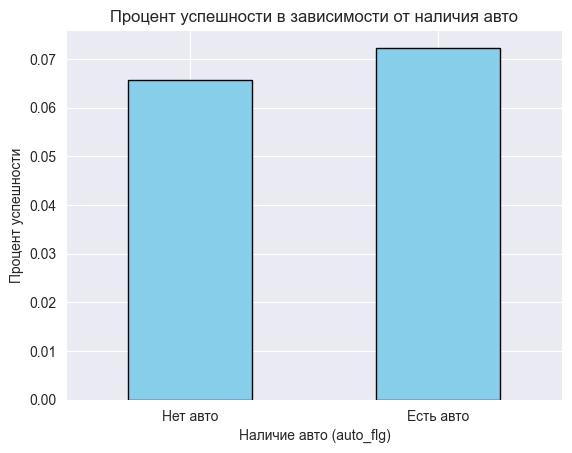

In [135]:
# Фильтрация данных и расчет среднего процента успешности по `auto_flg`
percent_by_auto = ccc_preapprove[['auto_flg', 'flag']].copy()
percent_by_auto = percent_by_auto.dropna(subset=['auto_flg'])  # Убираем NaN из auto_flg
percent_by_auto['auto_flg'] = percent_by_auto['auto_flg'].astype(int)  # Приведение к целому

# Группировка и расчет средней успешности
percent_by_auto = percent_by_auto.groupby('auto_flg').mean()

# Построение графика
ax = percent_by_auto.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)
ax.set_xticklabels(['Нет авто', 'Есть авто'], rotation=0)
plt.title("Процент успешности в зависимости от наличия авто")
plt.xlabel("Наличие авто (auto_flg)")
plt.ylabel("Процент успешности")
plt.show()


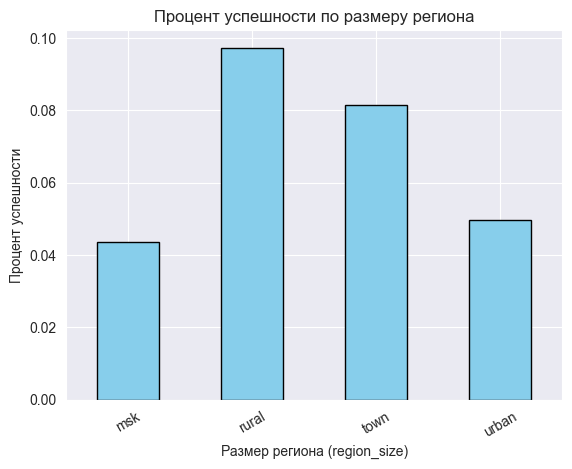

In [134]:
# Фильтрация данных и расчет среднего процента успешности по `region_size`
percent_by_region = ccc_preapprove[['region_size', 'flag']].copy()
percent_by_region = percent_by_region.dropna(subset=['region_size'])  # Убираем NaN из region_size

# Группировка и расчет средней успешности
percent_by_region = percent_by_region.groupby('region_size').mean()

# Построение графика
ax = percent_by_region.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)
ax.set_xticklabels(percent_by_region.index, rotation=30)
plt.title("Процент успешности по размеру региона")
plt.xlabel("Размер региона (region_size)")
plt.ylabel("Процент успешности")
plt.show()


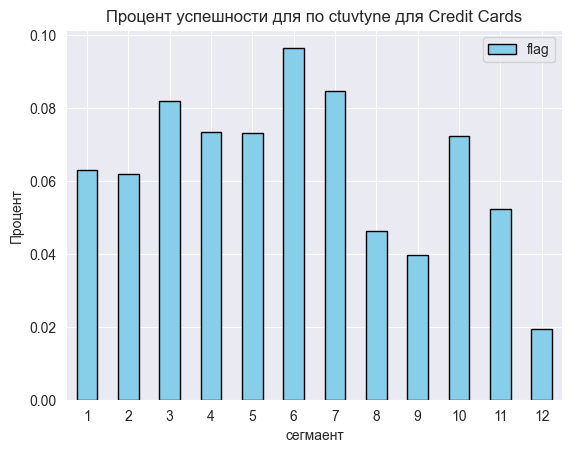

In [133]:
percent_by_child_cnt = ccc_preapprove[['num_segment', 'flag']].copy()
percent_by_child_cnt = percent_by_child_cnt[np.isfinite(percent_by_child_cnt['num_segment'])]
percent_by_child_cnt = percent_by_child_cnt.groupby('num_segment').mean()

ax = percent_by_child_cnt.plot(kind='bar', color='skyblue', edgecolor='black')
labels = [i for i in range(1, 13)]
ax.set_xticklabels(labels, rotation=0)
plt.title("Процент успешности для по ctuvtyne для Credit Cards")
plt.xlabel("сегмаент")
plt.ylabel("Процент")
plt.show()

In [613]:
cc_clients

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_age,emp_age_new,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flag,child_flg,income
0,23,342879157,27.0,M,None,NaN,NaN,NaN,NaN,NaN,...,56.0,55.0,W,NaN,4.0,Россия,Холост/не замужем,0,1,20323.50
1,63,282407696,41.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,52.0,51.0,W,NaN,3.0,Россия,Холост/не замужем,0,0,15823.50
2,117,509469281,42.0,F,town,0.0,0.0,0.0,0.0,1.0,...,30.0,29.0,W,NaN,2.0,Россия,Холост/не замужем,0,1,13639.56
3,710,326663782,21.0,F,town,0.0,0.0,1.0,0.0,1.0,...,67.0,67.0,W,NaN,52.0,None,None,0,0,12878.91
4,1178,480706447,44.0,M,town,0.0,0.0,0.0,0.0,1.0,...,67.0,66.0,W,NaN,51.0,None,None,0,1,7984.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,16372,572944033,NaN,None,town,0.0,0.0,0.0,0.0,0.0,...,40.0,40.0,W,NaN,NaN,None,None,1,0,NaN
6368,16492,473146702,NaN,None,None,NaN,NaN,NaN,NaN,NaN,...,40.0,38.0,W,NaN,73.0,None,None,0,1,NaN
6369,17761,371460142,NaN,None,rural,0.0,1.0,1.0,0.0,1.0,...,26.0,25.0,W,NaN,0.0,None,None,0,0,NaN
6370,18110,525669032,NaN,F,None,NaN,NaN,NaN,NaN,NaN,...,41.0,40.0,W,NaN,99.0,None,None,0,1,NaN


In [628]:
cc_clients['segment_number'] = cc_clients['segment_cd'].str.extract(r'\((\d+)\)').astype(float)

In [631]:
pt = cc_clients.pivot_table(index='segment_number', values='flag', aggfunc=['mean', 'count'])
pt[pt[('count', 'flag')] > np.percentile(pt[('count', 'flag')], 25)]

,mean,count
,flag,flag
segment_number,,
3.0,0.079365,63
4.0,0.139706,136
5.0,0.132353,68
7.0,0.115385,52
8.0,0.175439,114
9.0,0.113636,44
10.0,0.126582,79
11.0,0.054795,73


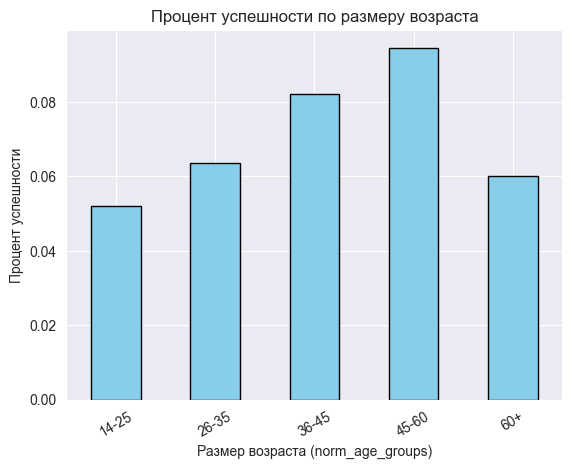

In [132]:
def sha_budet_rok(x):
    if x <= 25:
        return '14-25'
    elif x <= 35:
        return '26-35'
    elif x <= 45:
        return '36-45'
    elif x <= 60:
        return '45-60'
    else:
        return '60+'


ccc_preapprove['norm_age_groups'] = ccc_preapprove['age'].apply(lambda x: sha_budet_rok(x))

percent_by_age_groups = ccc_preapprove[['norm_age_groups', 'flag']].copy()
percent_by_age_groups = percent_by_age_groups.dropna(subset=['norm_age_groups'])  # Убираем NaN из region_size

# Группировка и расчет средней успешности
percent_by_age_groups = percent_by_age_groups.groupby('norm_age_groups').mean()

# Построение графика
ax = percent_by_age_groups.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)
ax.set_xticklabels(percent_by_age_groups.index, rotation=30)
plt.title("Процент успешности по размеру возраста")
plt.xlabel("Размер возраста (norm_age_groups)")
plt.ylabel("Процент успешности")
plt.show()


In [48]:
df['product_cd'].value_counts()

product_cd
Credit Cards          7401
Cash Loan             2402
MVNO                  1652
Debit Cards           1529
Investment             565
Secured Loan           435
Casco                  291
Mortgage Insurance     246
Car Loan               237
Osago                   23
Deposit                  8
Travel Avia              5
T-Auto                   2
Name: count, dtype: int64

In [97]:
def go():
    for n in range(101):
        for k in range(101):
            flag = True
            for i in range(1, 50):
                if i%2 == 0:
                    if i*k >= (i+1)*n:
                        flag = False
                        break
                else:
                    if i*n >= (i+1)*k:
                        flag = False
                        break
            if flag and k < n:
                return n, k

print(go())

(51, 50)


In [98]:
upsell

NameError: name 'upsell' is not defined

In [99]:
df[df['region_size'] == 'rural']

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,emp_marital_status_cd,flag,day_of_week,num_of_week,child_flg,income,segment_number,num_segment,month,season
63,63,282407696,41.0,M,rural,0.0,1.0,1.0,0.0,1.0,...,Холост/не замужем,0,Saturday,5,0,15823.50,7.0,2.0,2,Зима
213,213,424440108,19.0,F,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,0,Monday,0,0,8870.69,22.0,4.0,4,Весна
269,269,475900712,21.0,M,rural,0.0,0.0,1.0,0.0,1.0,...,NaN,0,Tuesday,1,0,12960.43,22.0,4.0,11,Осень
273,273,304142124,23.0,M,rural,0.0,0.0,1.0,1.0,1.0,...,NaN,0,Monday,0,0,15283.50,7.0,2.0,1,Зима
691,691,271346418,23.0,M,rural,0.0,0.0,0.0,0.0,1.0,...,NaN,0,Friday,4,0,9849.91,38.0,8.0,5,Весна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2305,454895657,NaN,NaN,rural,0.0,0.0,0.0,0.0,0.0,...,NaN,1,Wednesday,2,0,NaN,45.0,10.0,10,Осень
10076,10076,513612902,NaN,NaN,rural,0.0,0.0,0.0,0.0,0.0,...,NaN,1,Monday,0,0,NaN,33.0,6.0,7,Лето
12507,12507,485315511,NaN,NaN,rural,1.0,0.0,0.0,0.0,0.0,...,NaN,0,Friday,4,0,NaN,22.0,4.0,2,Зима
14213,14213,523479311,NaN,NaN,rural,0.0,0.0,0.0,0.0,0.0,...,NaN,0,Wednesday,2,0,NaN,33.0,6.0,8,Лето


In [101]:
[['num_segment', 'flag']].groupby(by='num_segment').mean()

,flag
num_segment,
1.0,0.120879
2.0,0.141264
3.0,0.159836
4.0,0.126679
5.0,0.149296
6.0,0.153465
7.0,0.127551
8.0,0.102564
9.0,0.113573


In [114]:
cc_clients['functional_cd'].value_counts()

functional_cd
Preapprove       5115
Utilization       410
Meeting           300
Afterfilling      280
Downsell          167
Reutilization     100
Name: count, dtype: int64

In [127]:
ccc_preapprove = cc_clients[cc_clients['functional_cd'] == 'Preapprove'].copy()

In [128]:
ccc_preapprove

,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,...,flag,day_of_week,num_of_week,child_flg,income,segment_number,num_segment,month,season,hours
3,710,326663782,21.0,F,town,0.0,0.0,1.0,0.0,1.0,...,0,Thursday,3,0,12878.91,36.0,9.0,10,Осень,12
4,1178,480706447,44.0,M,town,0.0,0.0,0.0,0.0,1.0,...,0,Friday,4,1,7984.12,16.0,4.0,8,Лето,12
5,1187,397419981,34.0,M,town,0.0,0.0,1.0,0.0,1.0,...,0,Saturday,5,0,8823.50,16.0,4.0,7,Лето,8
7,1338,68791731,33.0,F,town,0.0,0.0,0.0,0.0,0.0,...,0,Thursday,3,0,13823.50,19.0,5.0,10,Осень,11
9,1708,447394749,18.0,M,town,0.0,0.0,0.0,0.0,0.0,...,0,Wednesday,2,0,8747.30,36.0,9.0,10,Осень,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,12850,470384862,NaN,None,None,NaN,NaN,NaN,NaN,NaN,...,0,Monday,0,1,NaN,NaN,NaN,12,Зима,8
6305,14213,523479311,NaN,None,rural,0.0,0.0,0.0,0.0,0.0,...,0,Wednesday,2,0,NaN,33.0,6.0,8,Лето,14
6308,16372,572944033,NaN,None,town,0.0,0.0,0.0,0.0,0.0,...,1,Thursday,3,0,NaN,29.0,7.0,3,Весна,19
6310,17761,371460142,NaN,None,rural,0.0,1.0,1.0,0.0,1.0,...,0,Friday,4,0,NaN,6.0,1.0,12,Зима,19


In [129]:
ccc_preapprove['wo_hit_status_reason_desc'].value_counts()

wo_hit_status_reason_desc
Кредитная карта не нужна                                      3753
Кредит уже не нужен                                            730
Назначена встреча                                              356
Отказ по всем продуктам                                        178
Не устраивают условия                                           14
Согласен на подключение статуса Premium                          9
Не заинтересовало предложение/Нет необходимости                  5
Не нужна подписка                                                3
Клиент проинформирован о необходимости предоставить залог        2
Не интересно                                                     2
Подключит сам в приложении                                       2
Высокая ставка по кредиту                                        2
Дорого/Не интересно платное ГО                                   1
Согласен на подключение обеих подписок                           1
Оформлена сим-карта                 

In [131]:
ccc_preapprove[['auto_flg', 'flag']].groupby(by='auto_flg').mean()

,flag
auto_flg,
0.0,0.065605
1.0,0.072314


In [159]:
from scipy.stats import chi2_contingency

emp_19_21 = df[df['functional_cd'] == 'Cold'][['emp_age_new', 'flag']].copy()
emp_19_21['normis'] = (emp_19_21['emp_age_new'] <= 21).astype(int)

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(emp_19_21['flag'], emp_19_21['normis'])
print("Таблица сопряженности:")
print(contingency_table)

# Тест χ²
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nχ²: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Ожидаемые значения:")
print(expected)

# Интерпретация
if p < 0.05:
    print("\nРезультат: Есть статистически значимая связь между успешностью звонка и флагом молодого оператора.")
else:
    print("\nРезультат: Нет статистически значимой связи между успешностью звонка и флагом молодого оператора.")


Таблица сопряженности:
normis    0    1
flag            
0       724  270
1        76   61

χ²: 16.705244214330857
p-value: 4.36601419796628e-05
Degrees of freedom: 1
Ожидаемые значения:
[[703.09460654 290.90539346]
 [ 96.90539346  40.09460654]]

Результат: Есть статистически значимая связь между успешностью звонка и флагом молодого оператора.


In [161]:
upsell

,index,Unnamed: 0,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,...,flag,day_of_week,num_of_week,child_flg,income,segment_number,num_segment,month,season,hours
0,401,401,583950771,36.0,F,urban,0.0,0.0,1.0,0.0,...,0,Saturday,5,0,8727.08,27.0,7.0,10,Осень,12
1,1223,1223,478488115,29.0,M,urban,0.0,1.0,1.0,0.0,...,0,Saturday,5,0,9233.90,5.0,2.0,10,Осень,16
2,2297,2297,413337824,48.0,M,town,0.0,1.0,1.0,0.0,...,1,Wednesday,2,0,27823.50,10.0,3.0,10,Осень,19
3,3990,3990,582048049,32.0,M,None,NaN,NaN,NaN,NaN,...,0,Thursday,3,1,19323.50,NaN,NaN,6,Лето,15
4,4231,4231,385571527,34.0,M,None,NaN,NaN,NaN,NaN,...,0,Saturday,5,1,18386.74,NaN,NaN,11,Осень,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,18361,18361,173733196,32.0,M,msk,0.0,0.0,0.0,0.0,...,0,Wednesday,2,0,NaN,15.0,6.0,1,Зима,15
233,18365,18365,292492872,27.0,M,None,NaN,NaN,NaN,NaN,...,0,Tuesday,1,1,NaN,NaN,NaN,9,Осень,17
234,18480,18480,282425692,38.0,F,None,NaN,NaN,NaN,NaN,...,0,Sunday,6,1,NaN,NaN,NaN,5,Весна,15
235,18489,18489,293227109,23.0,M,urban,0.0,0.0,0.0,0.0,...,1,Wednesday,2,0,NaN,32.0,9.0,8,Лето,12


In [163]:
upsell['product_cd'].value_counts()

product_cd
Cash Loan       182
Secured Loan     55
Name: count, dtype: int64

In [164]:
cl_upsell = upsell[upsell['product_cd'] == 'Cash Loan'].copy()

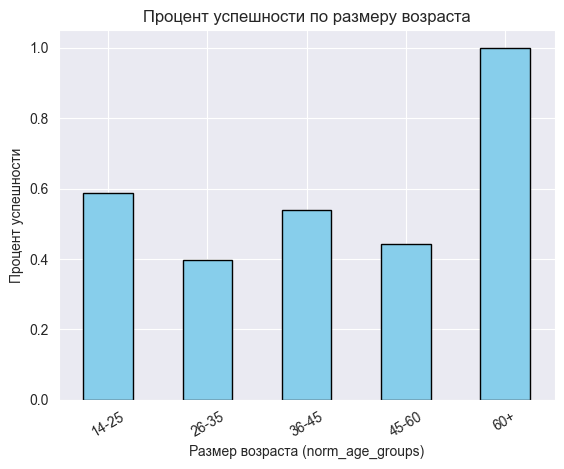

In [167]:
def sha_budet_rok(x):
    if x <= 25:
        return '14-25'
    elif x <= 35:
        return '26-35'
    elif x <= 45:
        return '36-45'
    elif x <= 60:
        return '45-60'
    else:
        return '60+'


cl_upsell['norm_age_groups'] = cl_upsell['age'].apply(lambda x: sha_budet_rok(x))

percent_by_age_groups = cl_upsell[['norm_age_groups', 'flag']].copy()
percent_by_age_groups = percent_by_age_groups.dropna(subset=['norm_age_groups'])  # Убираем NaN из region_size

# Группировка и расчет средней успешности
percent_by_age_groups = percent_by_age_groups.groupby('norm_age_groups').mean()

# Построение графика
ax = percent_by_age_groups.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)
ax.set_xticklabels(percent_by_age_groups.index, rotation=30)
plt.title("Процент успешности по размеру возраста")
plt.xlabel("Размер возраста (norm_age_groups)")
plt.ylabel("Процент успешности")
plt.show()

In [172]:
percent_by_age_groups = cl_upsell[['age', 'flag']].copy()
percent_by_age_groups = percent_by_age_groups.dropna(subset=['age'])  # Убираем NaN из region_size

In [175]:
percent_by_age_groups['age'].corr(cl_upsell['flag'])

np.float64(-0.017044957337770207)

In [177]:
cl_upsell[['auto_flg', 'flag']].groupby(by='flag').agg(['count', 'mean'])

auto_flg          
        count      mean
flag                   
0          79  0.721519
1          67  0.447761

In [181]:
from scipy.stats import chi2_contingency

cl_upsell_car = cl_upsell[['auto_flg', 'flag']].copy()

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(cl_upsell_car['flag'], cl_upsell_car['auto_flg'])
print("Таблица сопряженности:")
print(contingency_table)

# Тест χ²
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nχ²: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Ожидаемые значения:")
print(expected)

# Интерпретация
print("\nГипотеза: Люди без машины чаще соглашаются на апселл после заявки на кредит наличными.")
print(f"p-value: {p}")
if p < 0.05:
    print("Результат: Есть статистически значимая связь между флагом наличия машины и успешностью звонка.")
else:
    print("Результат: Нет статистически значимой связи между флагом наличия машины и успешностью звонка.")


Таблица сопряженности:
auto_flg  0.0  1.0
flag              
0          22   57
1          37   30

χ²: 10.17458174434223
p-value: 0.0014238999526609054
Degrees of freedom: 1
Ожидаемые значения:
[[31.92465753 47.07534247]
 [27.07534247 39.92465753]]

Гипотеза: Люди без машины чаще соглашаются на апселл после заявки на кредит наличными.
p-value: 0.0014238999526609054
Результат: Есть статистически значимая связь между флагом наличия машины и успешностью звонка.


In [183]:
upsell['polovina_ot_income'] = (upsell['income'] < 15000).astype(int)

In [186]:
from scipy.stats import chi2_contingency

cl_upsell_income = upsell[['polovina_ot_income', 'flag']].copy()

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(cl_upsell_income['flag'], cl_upsell_income['polovina_ot_income'])
print("Таблица сопряженности:")
print(contingency_table)

# Тест χ²
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nχ²: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Ожидаемые значения:")
print(expected)

# Интерпретация
print("\nГипотеза: Люди без с маленькой зп чаще соглащаются на апселл на кредит наличными.")
print(f"p-value: {p}")
if p < 0.05:
    print("Результат: Есть статистически значимая связь между зп и успешностью звонка.")
else:
    print("Результат: Нет статистически значимой связи между зп и успешностью звонка.")


Таблица сопряженности:
polovina_ot_income   0   1
flag                      
0                   94  40
1                   85  18

χ²: 4.178749743077725
p-value: 0.040933887320746175
Degrees of freedom: 1
Ожидаемые значения:
[[101.20675105  32.79324895]
 [ 77.79324895  25.20675105]]

Гипотеза: Люди без с маленькой зп чаще соглащаются на апселл на кредит наличными.
p-value: 0.040933887320746175
Результат: Есть статистически значимая связь между зп и успешностью звонка.
